In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import time
from pylab import rcParams
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
os.getcwd()

'C:\\Users\\dell'

In [3]:
os.chdir('C:\\Users\\dell\\Desktop\\Ds&ML\\Batch 74 Day 32\\Batch 74 Day 32\\Project -6 Sales Department')

In [4]:
os.getcwd()

'C:\\Users\\dell\\Desktop\\Ds&ML\\Batch 74 Day 32\\Batch 74 Day 32\\Project -6 Sales Department'

In [5]:
store_df =pd.read_csv('store.csv')
display(store_df)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
train_df = pd.read_csv('train.csv')
display(train_df)

C:\Users\dell\AppData\Local\Temp\ipykernel_5592\4108386063.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [7]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [9]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
col_list = train_df.columns
display(col_list)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

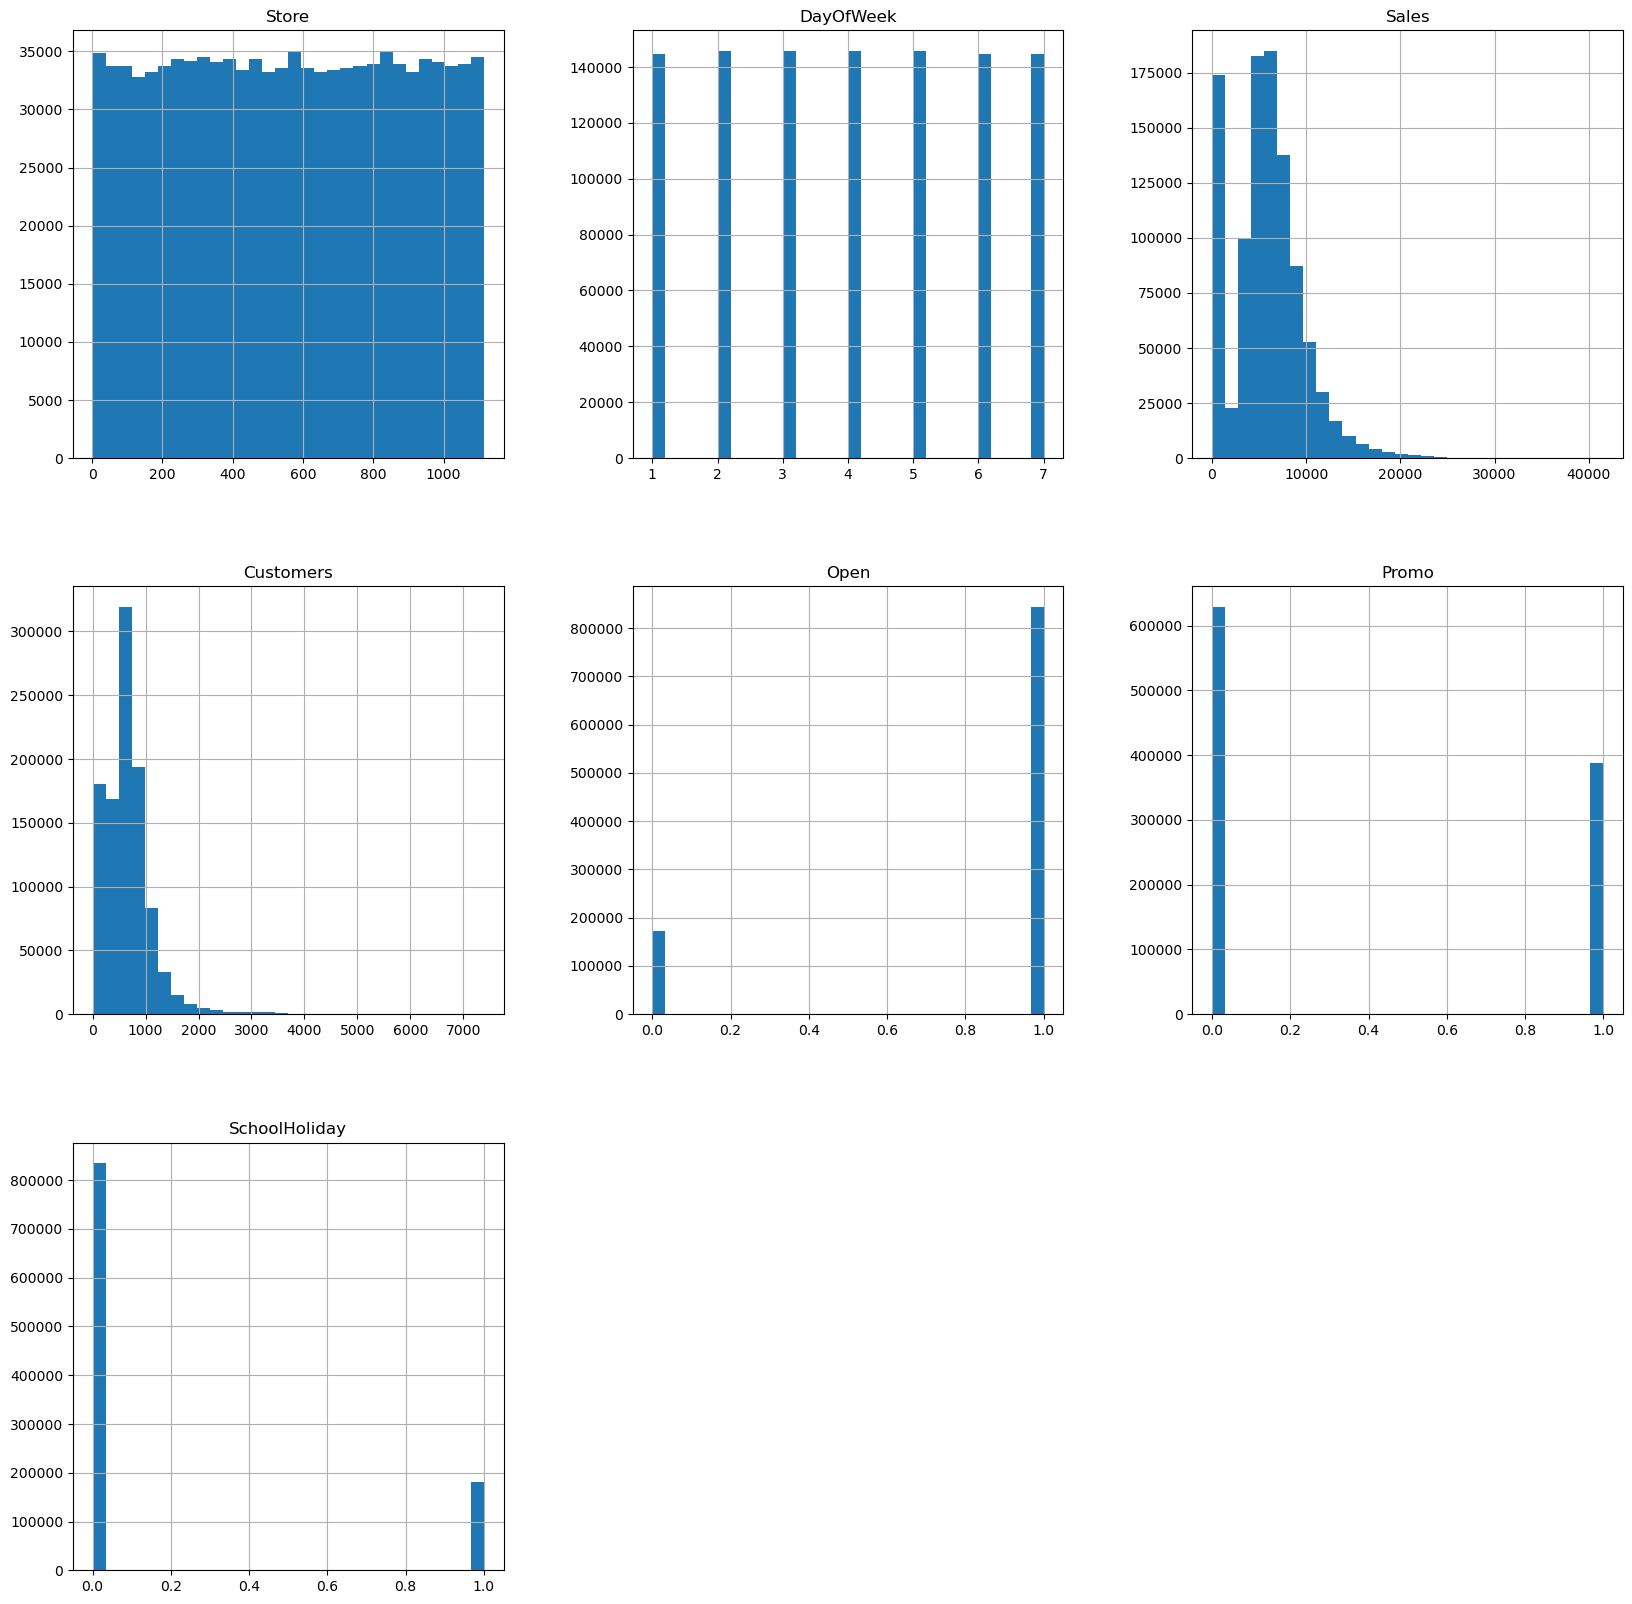

In [14]:
train_df.hist(figsize=(20,20),bins=30)

In [15]:
max_customer = train_df['Customers'].max()
display(max_customer)

7388

In [16]:
train_df['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [17]:
train_df2 = train_df[train_df.Open == 1]

In [18]:
train_df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [19]:
train_df3 = train_df2.drop('Open',axis=1)
train_df3

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [20]:
train_df3.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [21]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [22]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
store_df['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [25]:
store_df['Promo2SinceWeek']=store_df['Promo2SinceWeek'].replace(np.nan,0)

In [26]:
store_df['Promo2SinceYear']=store_df['Promo2SinceYear'].replace(np.nan,0)

In [27]:
store_df['PromoInterval']=store_df['PromoInterval'].replace(np.nan,0)

In [28]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [29]:
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].replace(np.nan,0)

In [30]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [31]:
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].replace(np.nan,0)

In [32]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          3
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [33]:
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(value=store_df['CompetitionDistance'].mean())

In [34]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

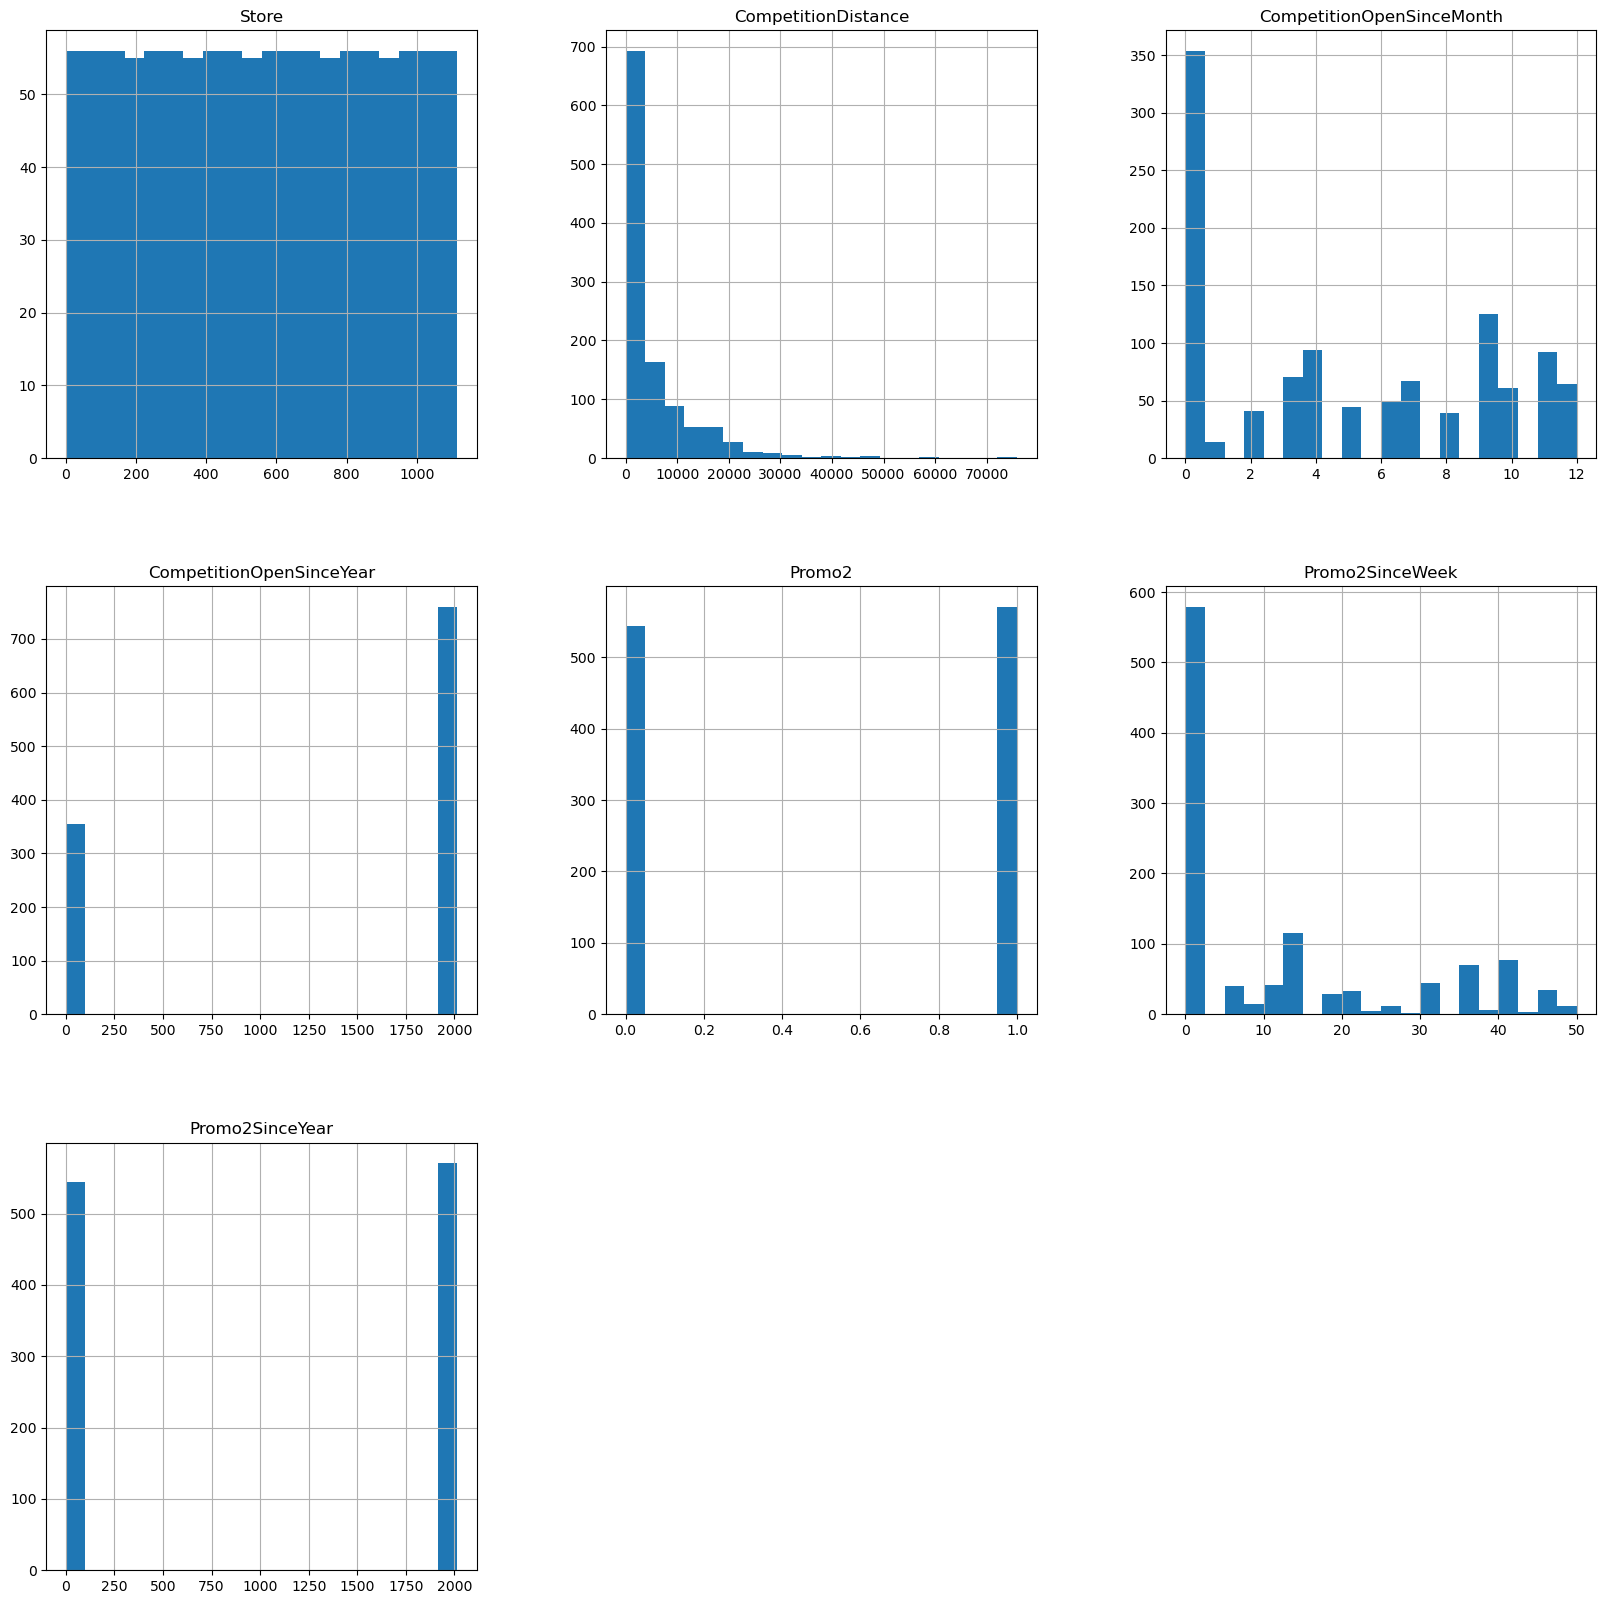

In [35]:
    store_df.hist(figsize=(20,20),bins=20)

In [36]:
store_train_df = pd.merge(store_df,train_df3,how='inner',on='Store')


In [37]:
display(store_train_df)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1


In [38]:
store_train_df.corr()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
Store,1.000000,-0.027031,-0.032555,-0.008152,0.007736,0.010857,0.007768,0.000346,0.007710,0.033977,-0.000012,0.000512
CompetitionDistance,-0.027031,1.000000,-0.033264,-0.002713,-0.141784,-0.124703,-0.141847,0.005528,-0.036343,-0.148362,-0.002390,-0.004274
CompetitionOpenSinceMonth,-0.032555,-0.033264,1.000000,0.785326,-0.082561,-0.109522,-0.082488,-0.000834,-0.018370,-0.021006,0.000711,-0.000131
CompetitionOpenSinceYear,-0.008152,-0.002713,0.785326,1.000000,-0.098571,-0.125080,-0.098503,-0.001303,0.005266,0.001666,0.000990,0.000126
Promo2,0.007736,-0.141784,-0.082561,-0.098571,1.000000,0.759523,0.999999,-0.003241,-0.127596,-0.202232,-0.000324,-0.008245
Promo2SinceWeek,0.010857,-0.124703,-0.109522,-0.125080,0.759523,1.000000,0.759337,-0.002736,-0.058476,-0.130841,-0.000802,-0.008062
Promo2SinceYear,0.007768,-0.141847,-0.082488,-0.098503,0.999999,0.759337,1.000000,-0.003238,-0.127621,-0.202204,-0.000326,-0.008248
DayOfWeek,0.000346,0.005528,-0.000834,-0.001303,-0.003241,-0.002736,-0.003238,1.000000,-0.178736,-0.097266,-0.289265,-0.139315
Sales,0.007710,-0.036343,-0.018370,0.005266,-0.127596,-0.058476,-0.127621,-0.178736,1.000000,0.823597,0.368145,0.038617
Customers,0.033977,-0.148362,-0.021006,0.001666,-0.202232,-0.130841,-0.202204,-0.097266,0.823597,1.000000,0.182846,0.024902


<AxesSubplot:>

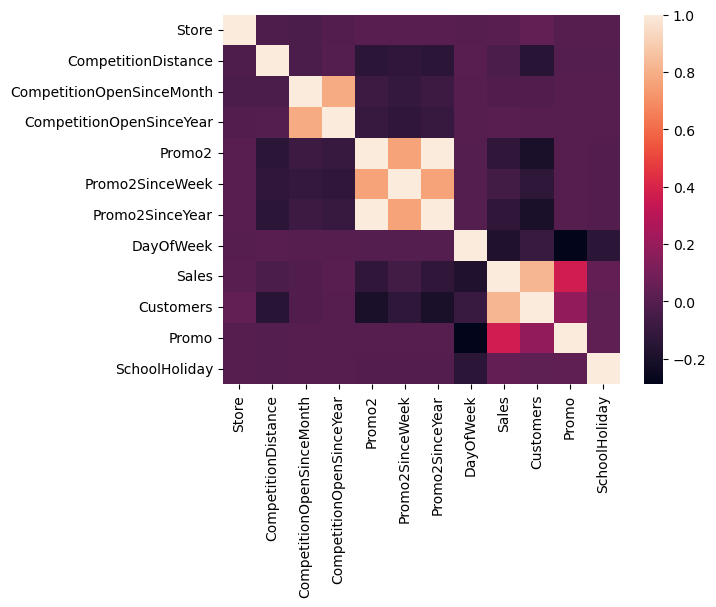

In [39]:
sns.heatmap(store_train_df.corr())

In [40]:
store_train_df['Date'] = store_train_df['Date'].apply(pd.to_datetime)

In [41]:
store_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   StoreType                  844392 non-null  object        
 2   Assortment                 844392 non-null  object        
 3   CompetitionDistance        844392 non-null  float64       
 4   CompetitionOpenSinceMonth  844392 non-null  float64       
 5   CompetitionOpenSinceYear   844392 non-null  float64       
 6   Promo2                     844392 non-null  int64         
 7   Promo2SinceWeek            844392 non-null  float64       
 8   Promo2SinceYear            844392 non-null  float64       
 9   PromoInterval              844392 non-null  object        
 10  DayOfWeek                  844392 non-null  int64         
 11  Date                       844392 non-null  datetime

In [42]:
store_train_df['day'] = store_train_df['Date'].dt.strftime('%d')
store_train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,31
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,30
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,29
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,28
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,07
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,05
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,04
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,03


In [43]:
store_train_df['Month'] = store_train_df['Date'].dt.strftime('%m')
store_train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,Month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,31,07
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,30,07
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,29,07
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,28,07
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,27,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,07,01
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,05,01
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,04,01
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,03,01


In [44]:
store_train_df['Year'] = store_train_df['Date'].dt.strftime('%y')
store_train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,31,07,15
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,30,07,15
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,29,07,15
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,28,07,15
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,27,07,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,07,01,13
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,05,01,13
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,04,01,13
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,03,01,13


In [45]:
store_train_df_month = store_train_df['Sales'].groupby(store_train_df.Month).mean()
store_train_df_month

Month
01    6563.690444
02    6589.165535
03    6976.412026
04    7046.228420
05    7106.453154
06    7000.978190
07    6952.682125
08    6648.984654
09    6546.343035
10    6602.843354
11    7188.554250
12    8608.956661
Name: Sales, dtype: float64

In [46]:
store_train_df_month.values

array([6563.69044393, 6589.16553469, 6976.41202605, 7046.22842006,
       7106.45315406, 7000.97818979, 6952.68212462, 6648.9846544 ,
       6546.34303459, 6602.8433536 , 7188.55424992, 8608.95666065])

<function matplotlib.pyplot.show(close=None, block=None)>

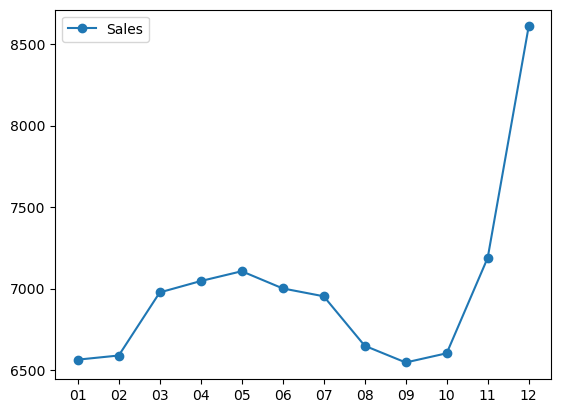

In [47]:
plt.plot(store_train_df_month.index,store_train_df_month.values,marker='o')
plt.legend(['Sales'])
plt.show

In [48]:
store_train_df_custavg = store_train_df['Customers'].groupby(store_train_df.Month).mean()
store_train_df_custavg

Month
01    722.514749
02    731.504792
03    759.081600
04    774.271806
05    779.290214
06    759.277357
07    752.745522
08    750.384706
09    745.613988
10    752.573557
11    782.671543
12    886.630385
Name: Customers, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

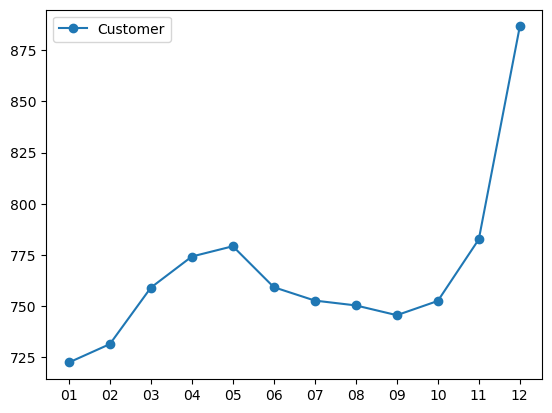

In [49]:
plt.plot(store_train_df_custavg.index,store_train_df_custavg.values,marker='o')
plt.legend(['Customer'])
plt.show

In [50]:
store_train_df_salesperday = store_train_df['Sales'].groupby(store_train_df.day).mean()
store_train_df_salesperday

day
01    8053.674102
02    7987.452335
03    7765.296991
04    7745.844134
05    7554.982112
06    7149.914351
07    7101.113826
08    6785.121061
09    6499.276895
10    6429.182961
11    6087.881843
12    6186.034047
13    6570.115406
14    6606.648700
15    7018.545523
16    7314.079684
17    7283.898949
18    7340.267275
19    7115.279322
20    6955.004553
21    6693.696159
22    6544.690081
23    6498.037037
24    5915.626283
25    5967.839608
26    6189.771018
27    6636.996208
28    6943.025241
29    7512.799109
30    8354.463914
31    7577.234928
Name: Sales, dtype: float64

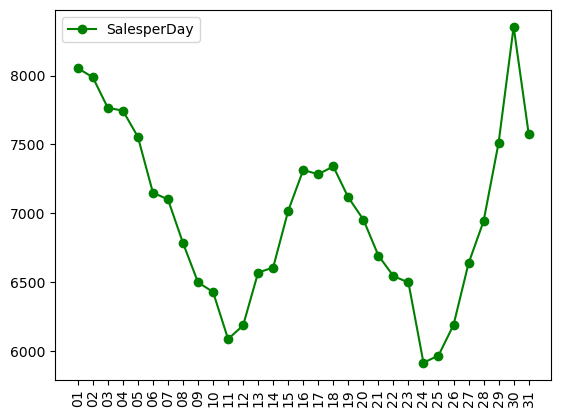

In [51]:
plt.plot(store_train_df_salesperday.index,store_train_df_salesperday.values, color='green', marker='o')
plt.xticks(rotation=90)
plt.legend(['SalesperDay'])
plt.show()

In [52]:
store_train_df_custperday = store_train_df['Customers'].groupby(store_train_df.day).mean()
store_train_df_custperday

day
01    846.284593
02    842.344108
03    818.100766
04    819.085296
05    802.752484
06    778.836139
07    776.275080
08    757.211580
09    730.633183
10    735.835861
11    707.363899
12    712.577910
13    738.660208
14    738.946981
15    763.165918
16    778.993083
17    785.059423
18    784.980902
19    774.986834
20    759.847311
21    742.814287
22    738.651815
23    739.939982
24    686.380109
25    692.722889
26    707.625764
27    733.561428
28    757.671484
29    789.575525
30    861.253704
31    786.980533
Name: Customers, dtype: float64

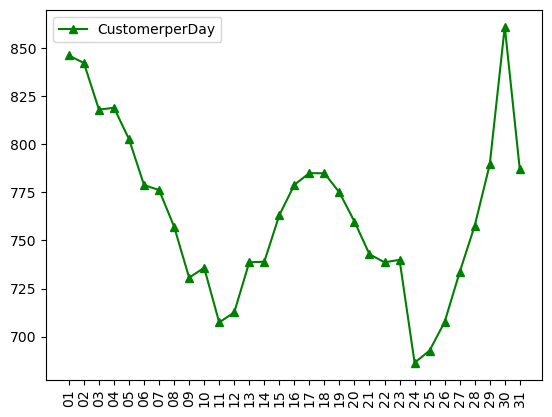

In [53]:
plt.plot(store_train_df_custperday.index,store_train_df_custperday.values, color='green', marker='^')
plt.xticks(rotation=90)
plt.legend(['CustomerperDay'])
plt.show()

In [54]:
store_train_df_salesweek = store_train_df.Sales.groupby(store_train_df.Date.dt.strftime('%W')).mean()
store_train_df_salesweek

Date
00     6007.654849
01     7650.125514
02     5971.568029
03     6535.705592
04     6376.133616
05     7589.022424
06     5691.986877
07     7238.187304
08     5845.255711
09     7680.063837
10     5632.674468
11     7339.336683
12     6723.644447
13     7939.636278
14     6424.874711
15     7303.083193
16     6064.352045
17     8660.406764
18     7474.317671
19     6503.248071
20     6921.209278
21     7220.327896
22     7939.469520
23     5987.047669
24     7669.226901
25     5787.862383
26     8086.932452
27     5942.360279
28     7650.502551
29     5636.727039
30     8217.650816
31     6562.699886
32     6754.930540
33     6317.321741
34     6839.573145
35     6572.241138
36     6749.369938
37     6133.769006
38     6275.501457
39     7376.851517
40     7525.025485
41     5515.545102
42     6884.212604
43     6280.878102
44     7878.026188
45     6454.084408
46     6829.011082
47     7661.674882
48     9133.437976
49     6857.278683
50    10939.013841
51     8132.852867
52     

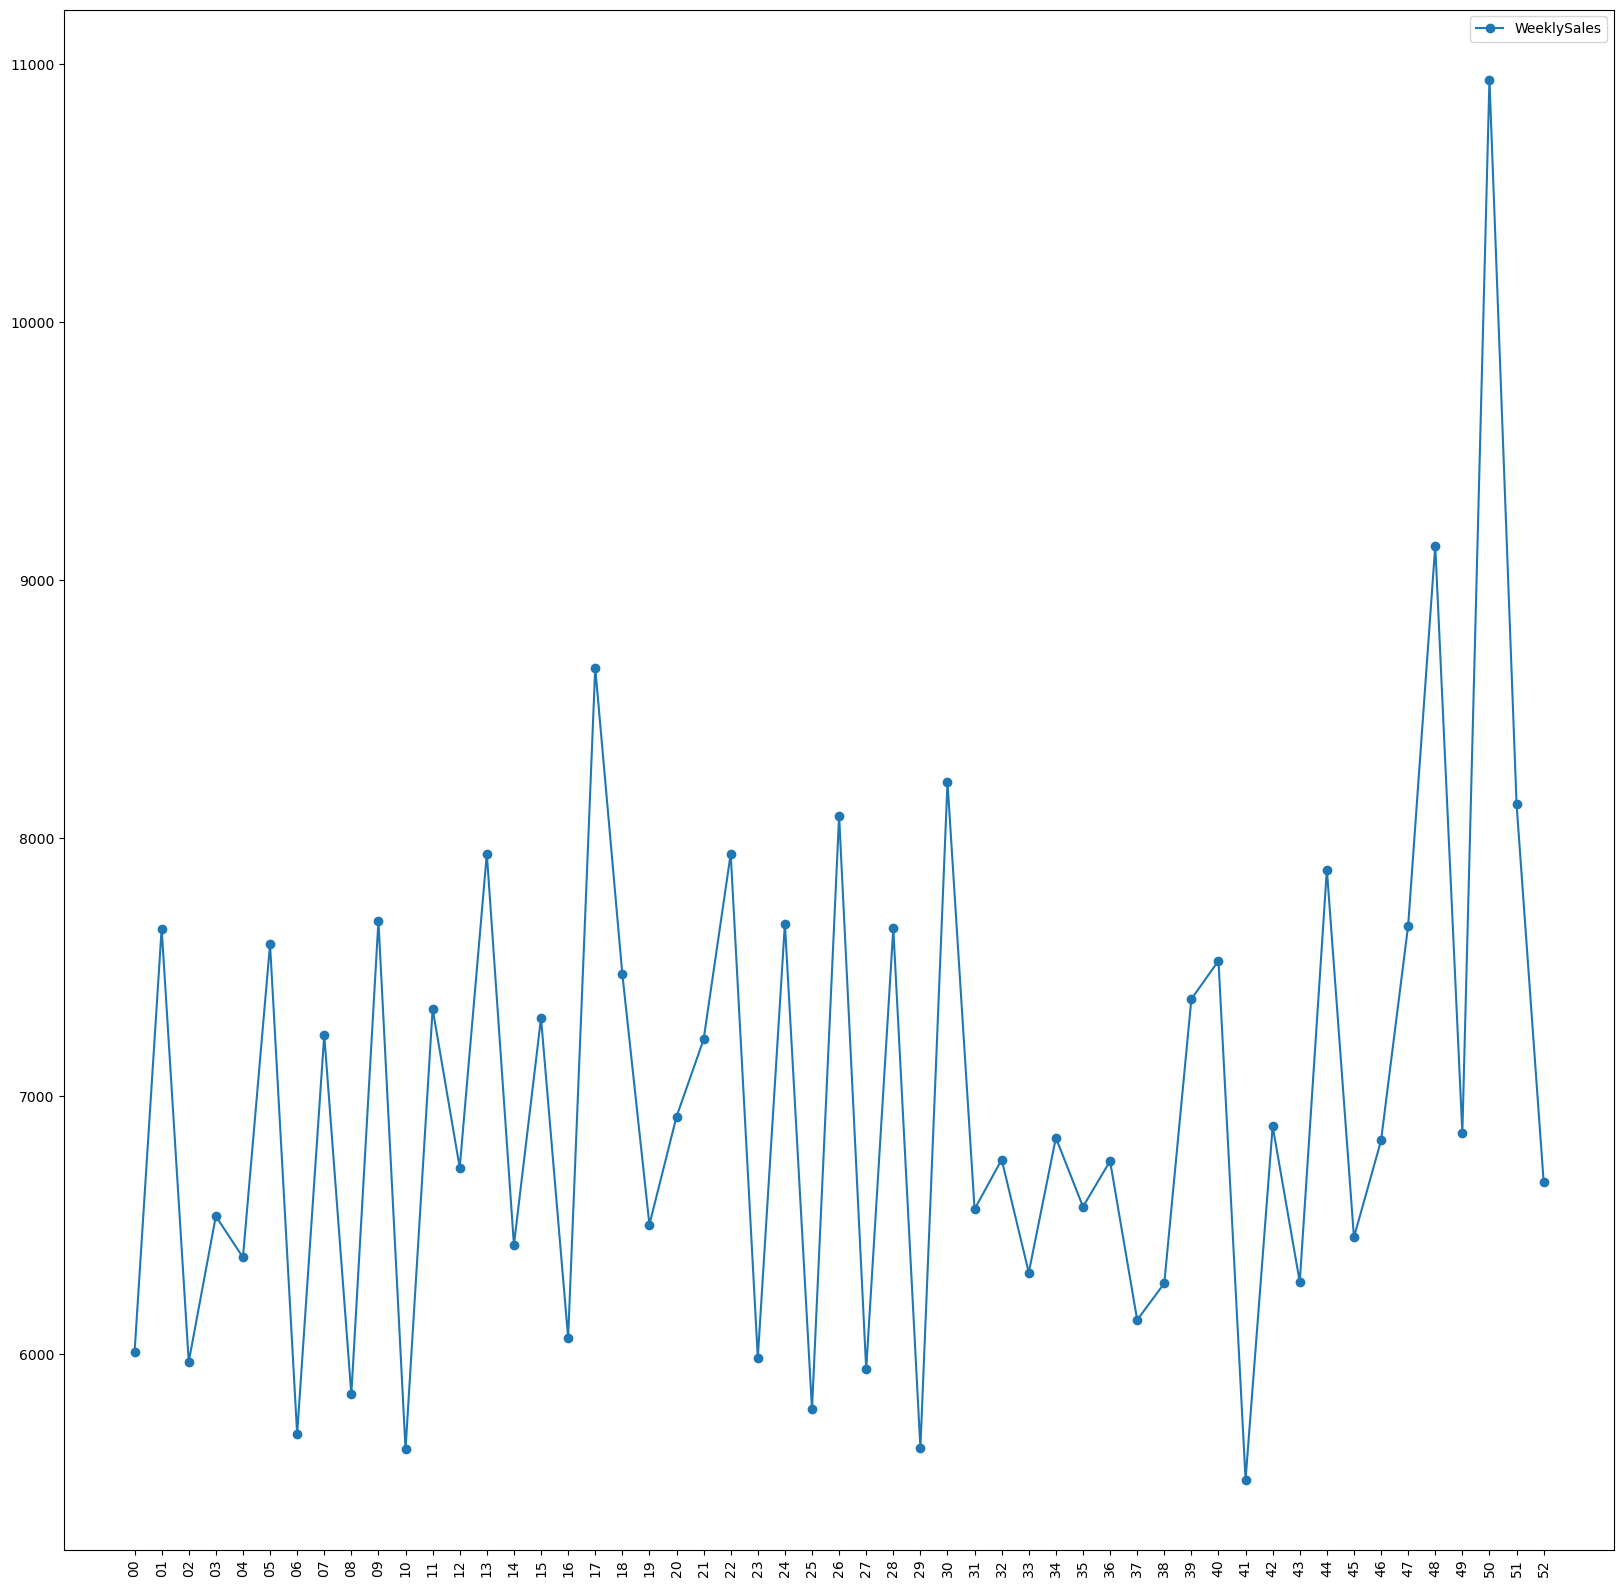

In [55]:
plt.figure(figsize=(20,20))
plt.plot(store_train_df_salesweek.index,store_train_df_salesweek.values,marker='o')
plt.xticks(rotation=90)
plt.legend(['WeeklySales'])

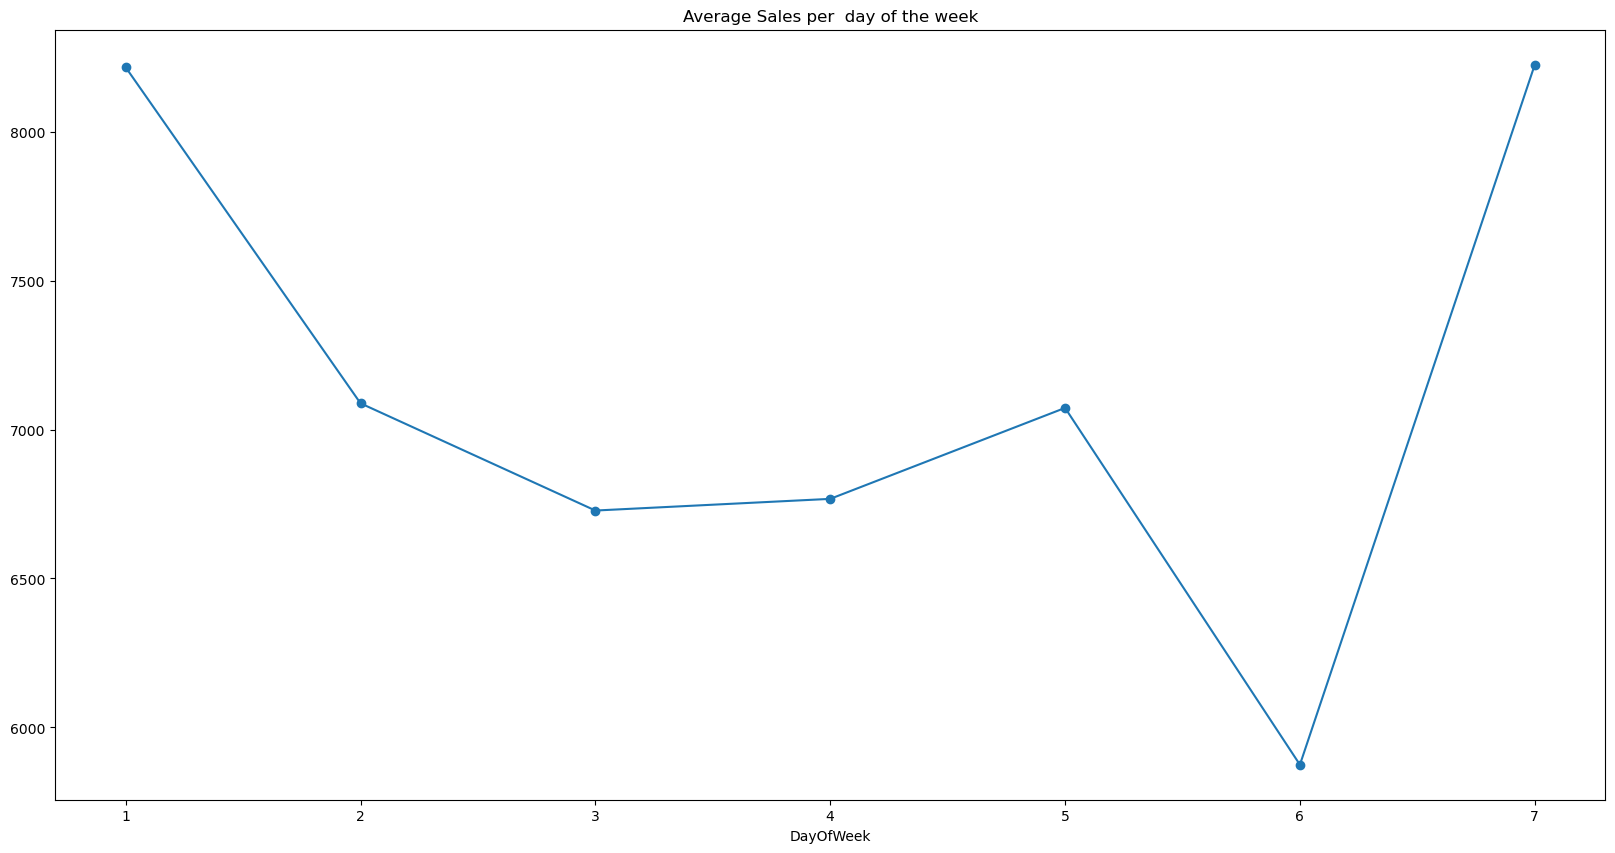

In [56]:
axis = store_train_df['Sales'].groupby(store_train_df.DayOfWeek).mean().plot(figsize=(20,10),marker='o')
axis.set_title('Average Sales per  day of the week')
plt.show()

Text(0.5, 1.0, 'Average Customer per day of the week')

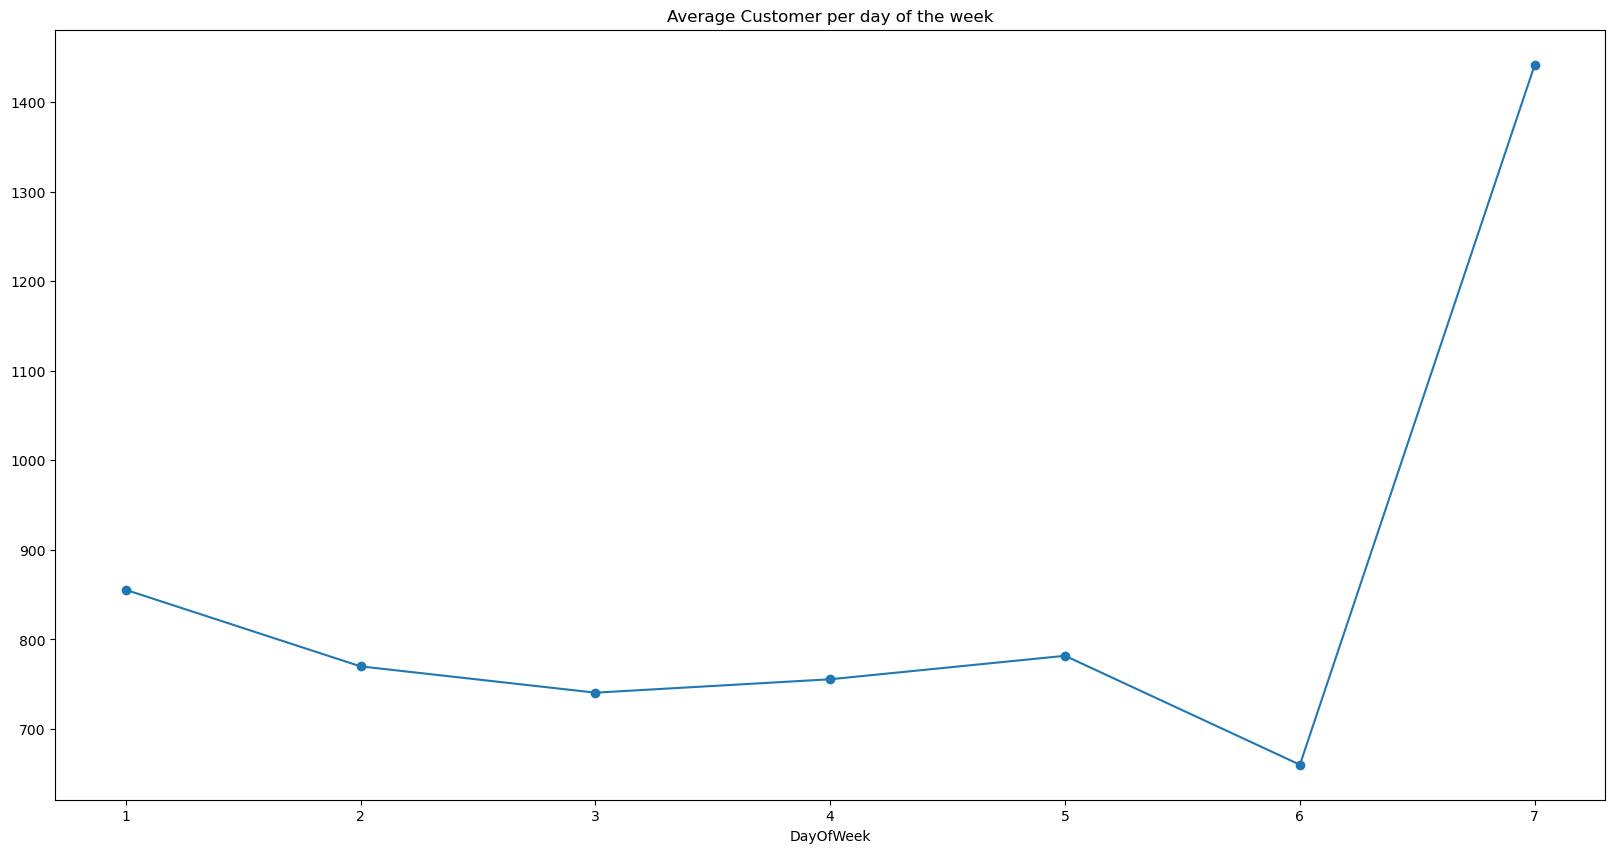

In [57]:
axis = store_train_df.Customers.groupby(store_train_df.DayOfWeek).mean().plot(figsize=(20,10),marker='o')
axis.set_title('Average Customer per day of the week')

In [58]:
store_train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,31,07,15
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,30,07,15
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,29,07,15
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,28,07,15
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,27,07,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,07,01,13
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,05,01,13
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,04,01,13
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,03,01,13


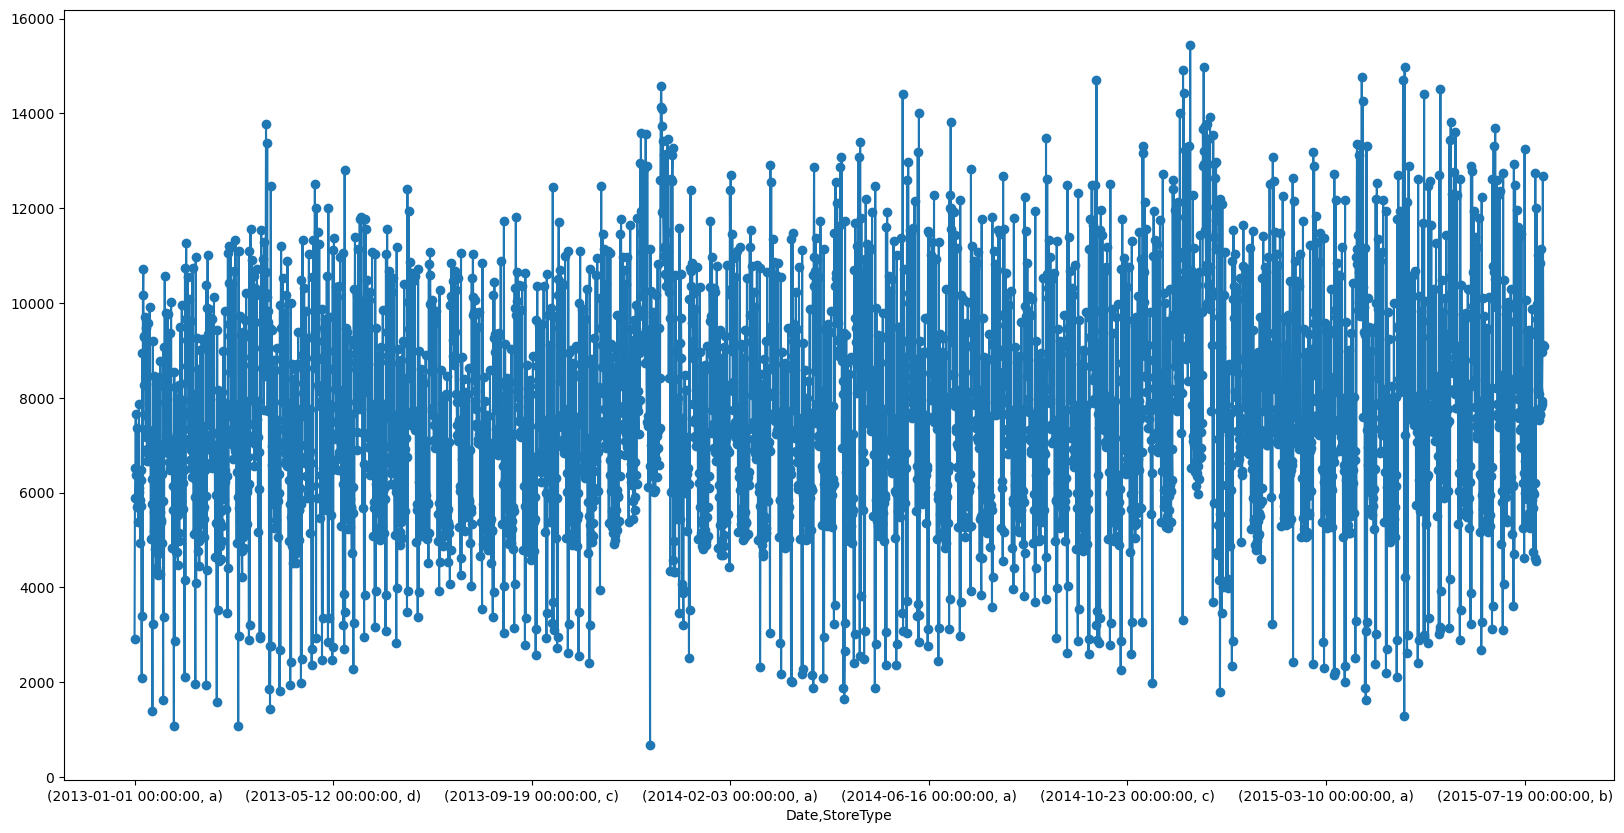

In [59]:
ax = store_train_df.groupby(['Date','StoreType']).mean().Sales.plot(figsize=(20,10),marker='o')

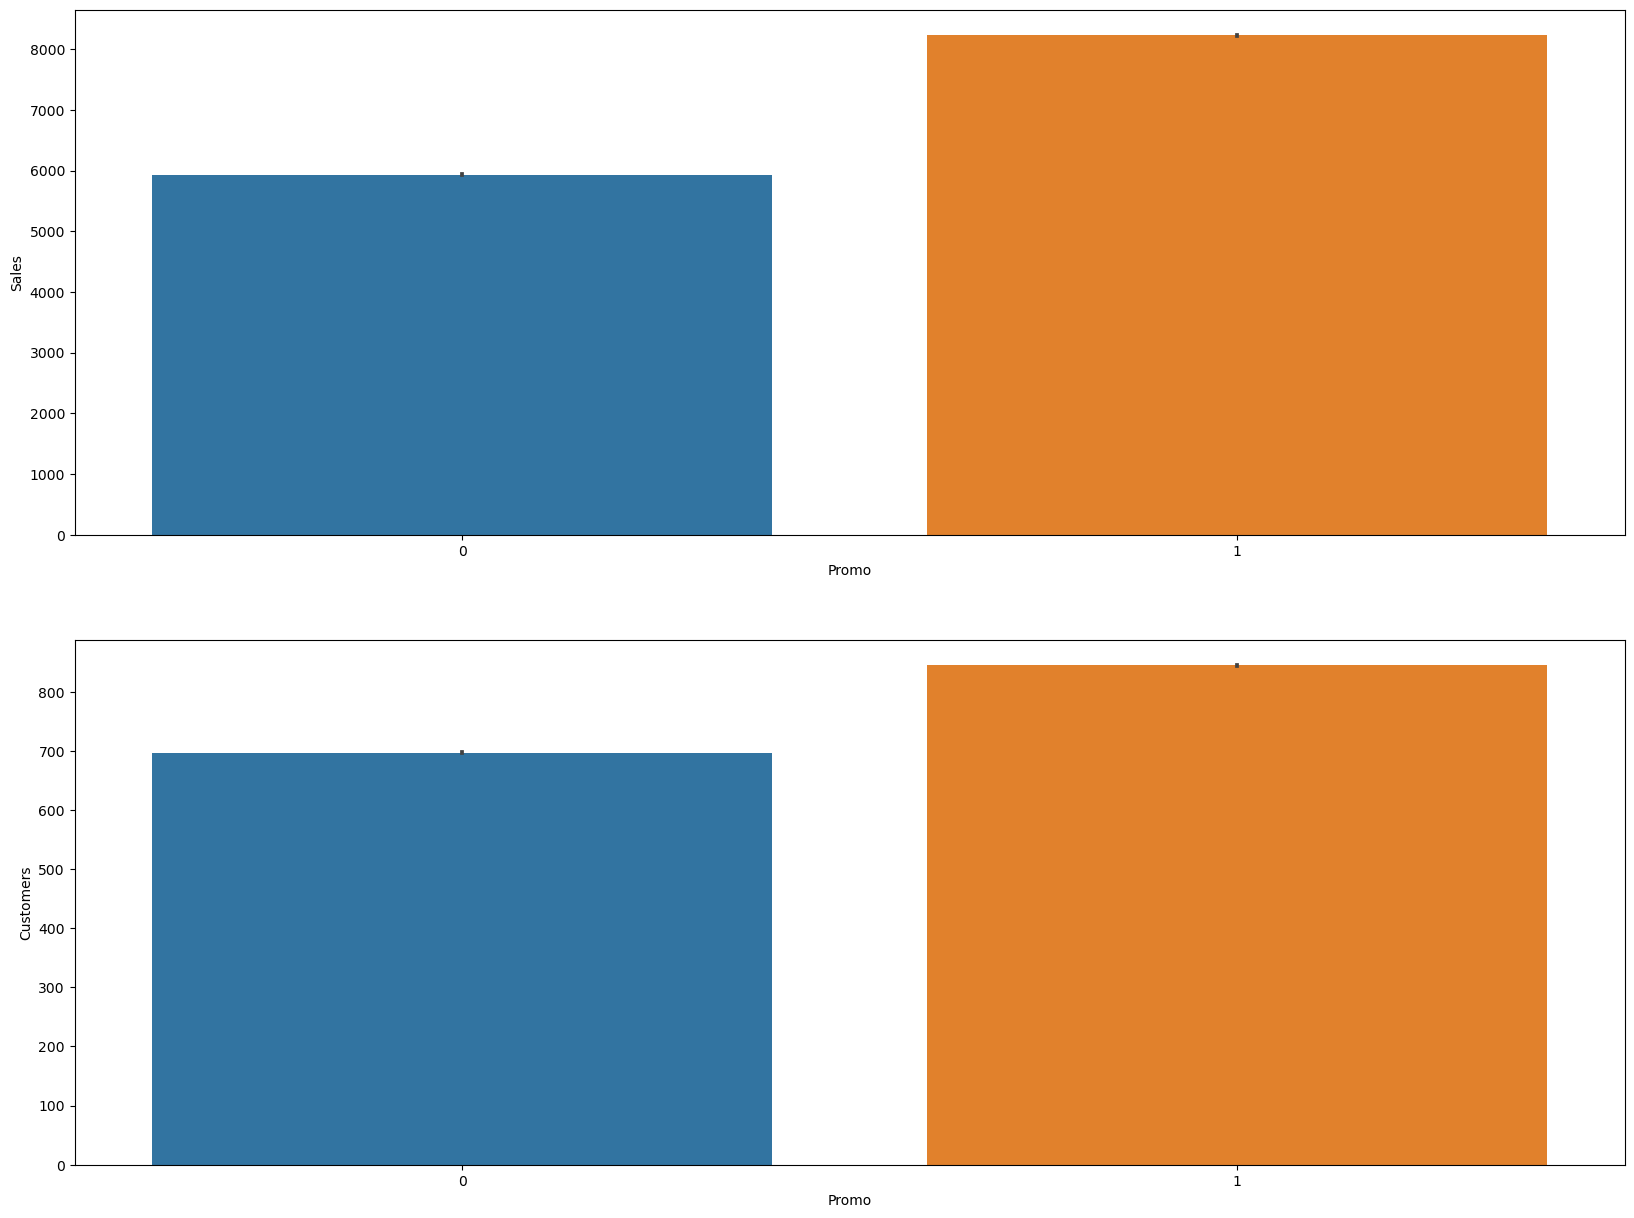

In [60]:
plt.figure(figsize=[20,15])

plt.subplot(211)
sns.barplot(x = 'Promo', y = 'Sales', data = store_train_df)

plt.subplot(212)
sns.barplot(x = 'Promo', y = 'Customers', data = store_train_df) 
plt.show()

def sales_prediction(store_id,sales_df,periods):
    sales_df = sales_df[sales_df['Store']==store_id]
    sales_df = sales_df[['Date','Sales']].rename(columns={'Date':'ds','Sales':'y'})
    sales_df =  sales_df.sort_values('ds')
    sales_df = sales_df.set_index('ds')
    display(sales_df)
    '''#creating model
    aa= auto_arima(sales_df, m = periods, trace = True, D=1).summary()
    Model = SARIMAX(sales_df,order=aa.order,seasonal_order=aa.seasonal_order)
    Model = Model.fit()
    fpred= Model.predict(periods, 2*len(sales_df),  typ = 'levels' )
    display (fpred)
    '''

In [61]:
store_train_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,Month,Year
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,0,1,31,07,15
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,0,1,30,07,15
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,0,1,29,07,15
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,0,1,28,07,15
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,0,1,27,07,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,0,1,07,01,13
844388,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,0,0,1,05,01,13
844389,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,0,0,1,04,01,13
844390,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,0,0,1,03,01,13


In [62]:
sales_df = store_train_df[store_train_df['Store']==10]
sales_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,day,Month,Year
7036,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,5,2015-07-31,7185,681,1,0,1,31,07,15
7037,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,4,2015-07-30,6186,556,1,0,1,30,07,15
7038,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,3,2015-07-29,5524,518,1,0,1,29,07,15
7039,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,2,2015-07-28,6140,593,1,0,1,28,07,15
7040,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,1,2015-07-27,7212,662,1,0,1,27,07,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7815,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,1,2013-01-07,7804,751,1,0,0,07,01,13
7816,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,6,2013-01-05,4256,489,0,0,0,05,01,13
7817,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,5,2013-01-04,5114,517,0,0,1,04,01,13
7818,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0,4,2013-01-03,4675,491,0,0,1,03,01,13


In [63]:
sales_df = sales_df[['Date','Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})


In [64]:
sales_df 

,ds,y
7036,2015-07-31,7185
7037,2015-07-30,6186
7038,2015-07-29,5524
7039,2015-07-28,6140
7040,2015-07-27,7212
...,...,...
7815,2013-01-07,7804
7816,2013-01-05,4256
7817,2013-01-04,5114
7818,2013-01-03,4675


In [65]:
sales_df= sales_df.set_index('ds') 

In [66]:
sales_df 

,y
ds,
2015-07-31,7185
2015-07-30,6186
2015-07-29,5524
2015-07-28,6140
2015-07-27,7212
...,...
2013-01-07,7804
2013-01-05,4256
2013-01-04,5114


In [67]:
sales_df= sales_df.sort_values('ds')
sales_df

,y
ds,
2013-01-02,4812
2013-01-03,4675
2013-01-04,5114
2013-01-05,4256
2013-01-07,7804
...,...
2015-07-27,7212
2015-07-28,6140
2015-07-29,5524


In [68]:
print(sales_df)

               y
ds              
2013-01-02  4812
2013-01-03  4675
2013-01-04  5114
2013-01-05  4256
2013-01-07  7804
...          ...
2015-07-27  7212
2015-07-28  6140
2015-07-29  5524
2015-07-30  6186
2015-07-31  7185

[784 rows x 1 columns]


<AxesSubplot:xlabel='ds'>

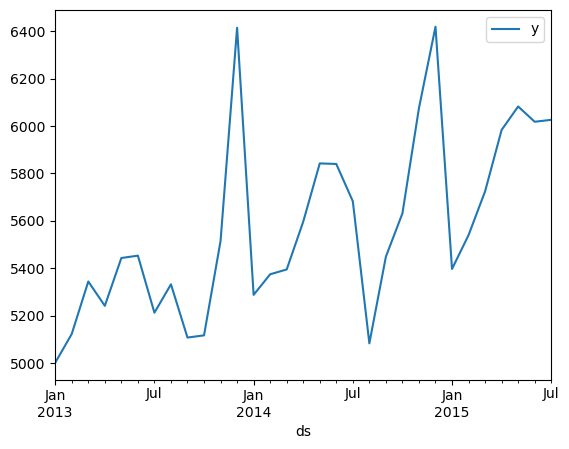

In [69]:
ts_week=sales_df.resample('M').mean()
ts_week.plot()

In [70]:
ts_week

,y
ds,
2013-01-31,5001.615385
2013-02-28,5123.166667
2013-03-31,5344.360000
2013-04-30,5241.600000
2013-05-31,5443.416667
2013-06-30,5453.360000
2013-07-31,5212.666667
2013-08-31,5332.481481
2013-09-30,5107.760000


<AxesSubplot:xlabel='ds'>

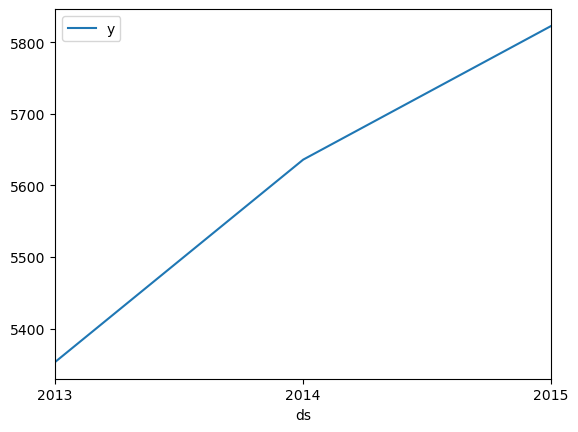

In [71]:
ts_week=sales_df.resample('Y').mean()
ts_week.plot()

In [72]:
ts_week

,y
ds,
2013-12-31,5353.404605
2014-12-31,5636.101974
2015-12-31,5822.909091


<Figure size 640x480 with 0 Axes>

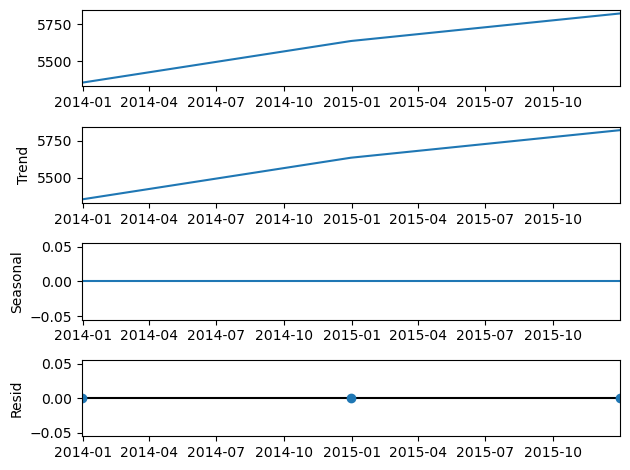

In [73]:
decomposition=seasonal_decompose(ts_week,period=1)
fig=plt.figure()
fig=decomposition.plot()

In [74]:
#auto_arima(ts_week, m = 1, trace = True, D=1).summary()

In [75]:
sales_df

,y
ds,
2013-01-02,4812
2013-01-03,4675
2013-01-04,5114
2013-01-05,4256
2013-01-07,7804
...,...
2015-07-27,7212
2015-07-28,6140
2015-07-29,5524


In [76]:
ts_month = sales_df.resample('M').mean()
ts_month

,y
ds,
2013-01-31,5001.615385
2013-02-28,5123.166667
2013-03-31,5344.360000
2013-04-30,5241.600000
2013-05-31,5443.416667
2013-06-30,5453.360000
2013-07-31,5212.666667
2013-08-31,5332.481481
2013-09-30,5107.760000


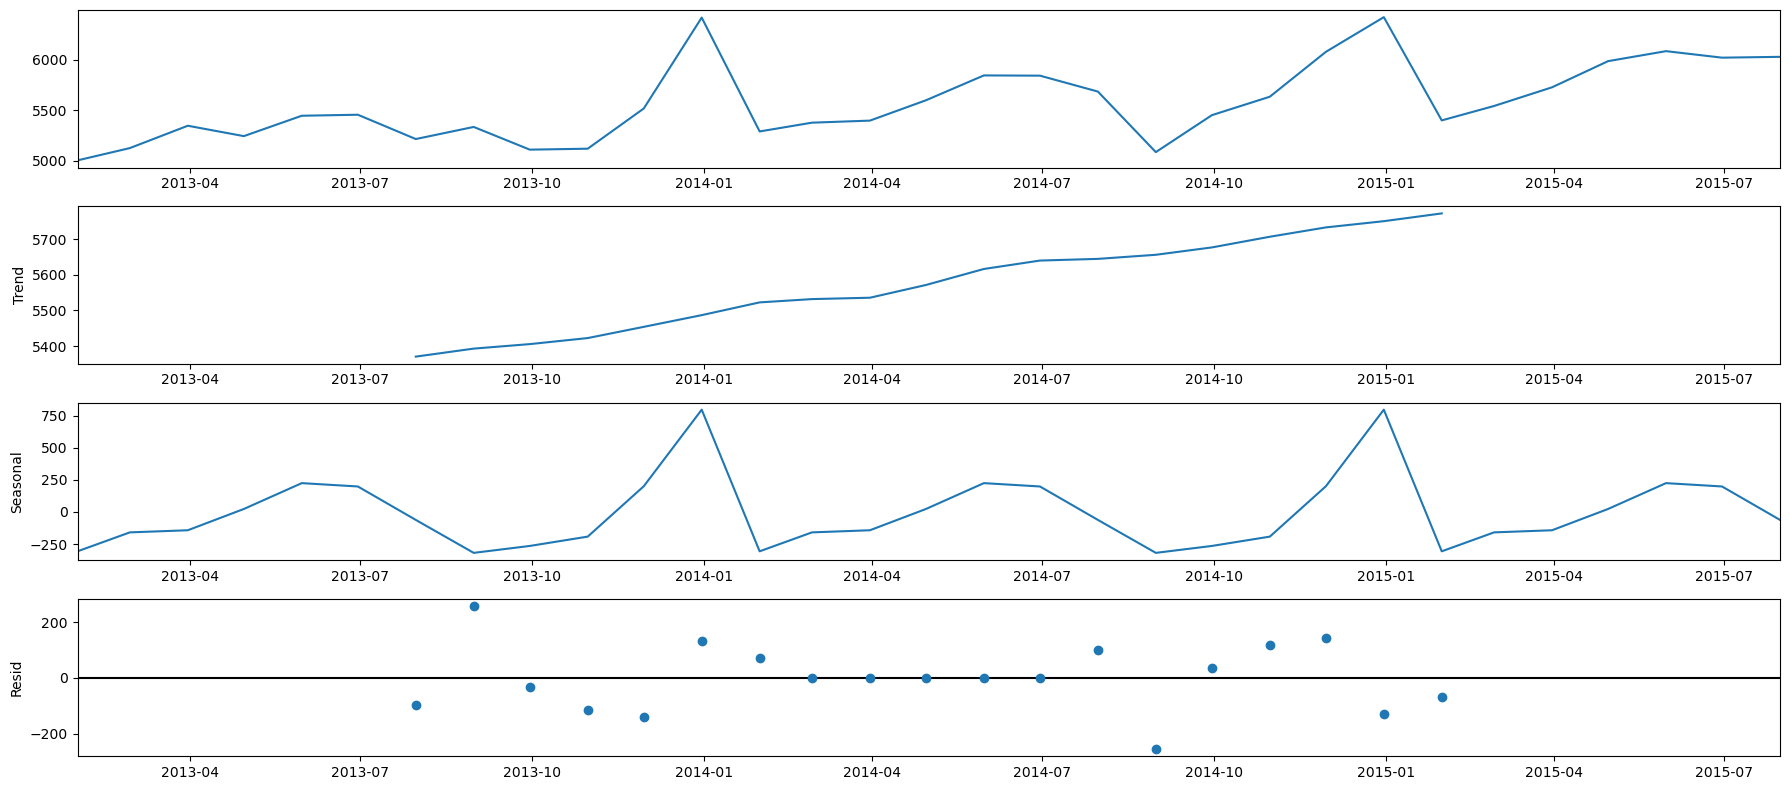

In [77]:

rcParams['figure.figsize']=18,8
decomposition = sm.tsa.seasonal_decompose(ts_month,model='additive')
fig = decomposition.plot()
plt.show()

In [78]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x(0, 0, 1, 12)
SARIMAX: (0, 0, 1) x(0, 1, 0, 12)
SARIMAX: (0, 1, 0) x(0, 1, 1, 12)
SARIMAX: (0, 1, 0) x(1, 0, 0, 12)


In [79]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_month,order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationary = False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12-AIC:{}'.format(param,
                 param_seasonal,results.aic))
        except:continue
                       

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:624.9093392396329
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:608.0168947955618
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:276.26509116240624
ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:265.8822334672036
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:519.384235115198
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:516.3046260042813
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:258.02288260469743
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:260.0210370525849
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:606.9665042732499
ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:572.081972984134
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:272.30523207186695
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:265.66270936469795
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:505.7607121653111
ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:504.19242224404377
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:259.3938801542374
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:261.6795787454399
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:445.5545941745587
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:442.34492703314424
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:256.401

In [80]:
#ARIMA(0, 1, 1)x(0, 1, 0, 12)12-AIC:249.47023964248973

In [81]:
from pmdarima import auto_arima
auto_arima(ts_month, m = 12, trace = True, D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=257.274, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=261.217, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=276.265, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=259.273, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=259.177, Time=0.12 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=261.186, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=259.218, Time=0.06 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 1.347 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   31
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -126.637
Date:                  Fri, 30 Jun 2023   AIC                            257.274
Time:                          19:10:47   BIC                            259.162
Sample:                      01-31-2013   HQIC                           257.593
                           - 07-31-2015                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    269.7174     52.336      5.154      0.000     167.141     372.293
sigma2      3.604e+04   1.19e+04      3.035      0.002    1.28e+04    5.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 3.23
Prob(Q):                              0.77   Prob(JB):                         0.20
Heteroskedasticity (H):               0.50   Skew:                            -0.93
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
mod = sm.tsa.statespace.SARIMAX(ts_month,order=(0,1,1),seasonal_order=(0,1,0,12),enforce_stationary=False,enforce_invertibilty = False)
results= mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9974     17.672     -0.056      0.955     -35.634      33.639
sigma2      3.615e+04   6.36e+05      0.057      0.955   -1.21e+06    1.28e+06


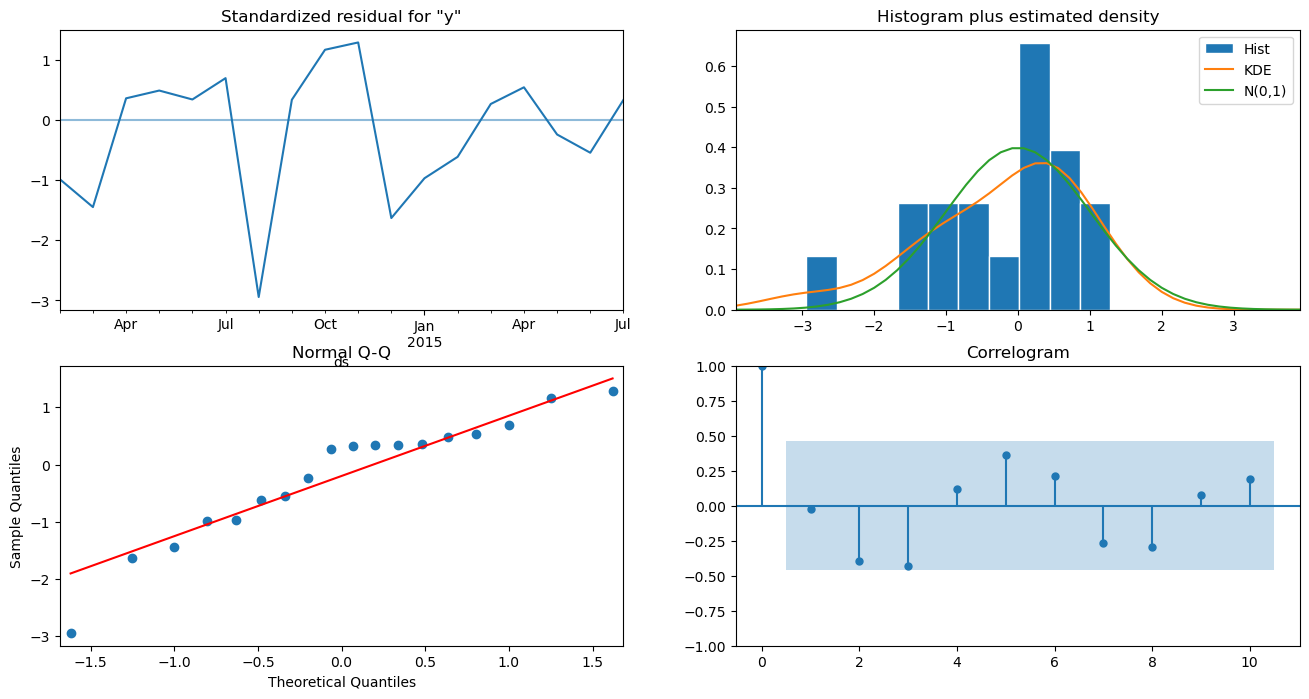

In [83]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

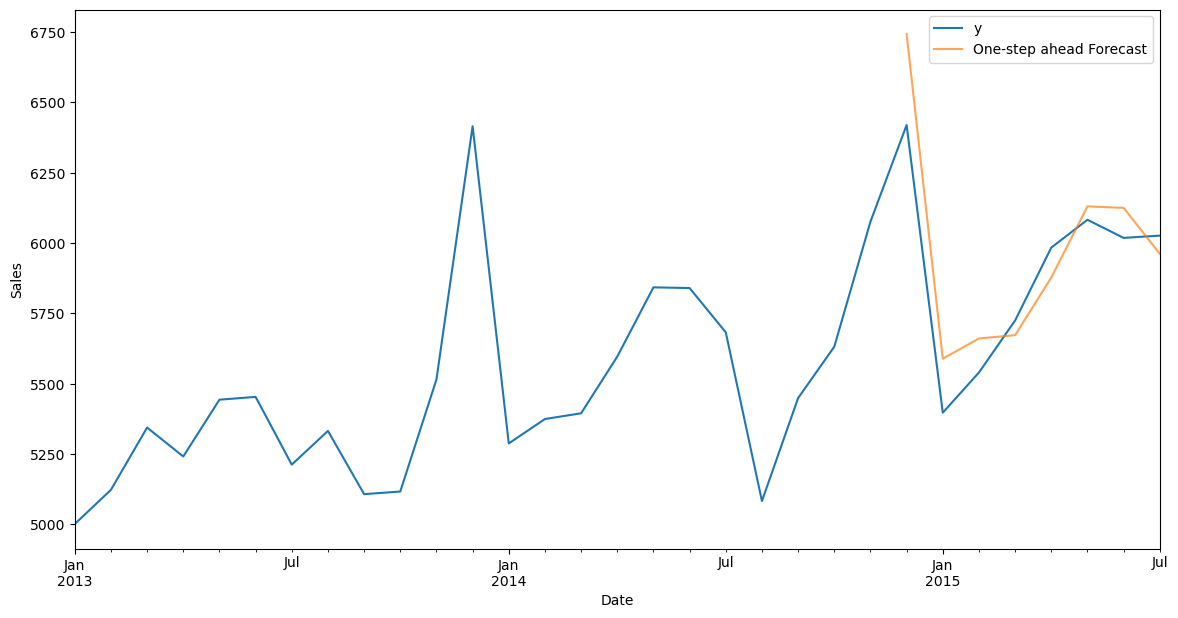

In [84]:
pred = results.get_prediction(start=pd.to_datetime('2014-12-31'),dynamic = False)
pred_ci = pred.conf_int()
ax= ts_month['2013':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',alpha=.7,figsize=(14,7))
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [85]:
y_forecasted= pred.predicted_mean
y_forecasted

ds
2014-12-31    6742.710163
2015-01-31    5588.892221
2015-02-28    5660.967534
2015-03-31    5672.687514
2015-04-30    5877.605867
2015-05-31    6130.277459
2015-06-30    6124.973387
2015-07-31    5961.685168
Freq: M, Name: predicted_mean, dtype: float64

In [86]:
pred_uc = results.get_forecast(steps=29)
display(pred_uc.predicted_mean)

2015-08-31    5365.686585
2015-09-30    5731.455816
2015-10-31    5914.032739
2015-11-30    6358.298893
2015-12-31    6701.618893
2016-01-31    5679.609662
2016-02-29    5822.337226
2016-03-31    6007.071201
2016-04-30    6266.170560
2016-05-31    6365.118024
2016-06-30    6300.686585
2016-07-31    6308.786301
2016-08-31    5648.065479
2016-09-30    6013.834709
2016-10-31    6196.411632
2016-11-30    6640.677786
2016-12-31    6983.997786
2017-01-31    5961.988555
2017-02-28    6104.716120
2017-03-31    6289.450094
2017-04-30    6548.549453
2017-05-31    6647.496917
2017-06-30    6583.065479
2017-07-31    6591.165194
2017-08-31    5930.444372
2017-09-30    6296.213602
2017-10-31    6478.790525
2017-11-30    6923.056679
2017-12-31    7266.376679
Freq: M, Name: predicted_mean, dtype: float64

In [87]:
def sales_prediction(store_id,sales_df,periods):
    sales_df = sales_df[sales_df['Store']==store_id]
    sales_df = sales_df[['Date','Sales']].rename(columns={'Date':'ds','Sales':'y'})
    sales_df =  sales_df.sort_values('ds')
    sales_df = sales_df.set_index('ds')
    ts_month = sales_df.resample('M').mean()
    decomposition = sm.tsa.seasonal_decompose(ts_month,model='additive')
    fig = decomposition.plot()
    plt.show()
    p=d=q=range(0,2)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts_month,order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationary = False,
                                            enforce_invertibility=False)
                results = mod.fit()
            except:continue
    mod = sm.tsa.statespace.SARIMAX(ts_month,order=(0,1,1),seasonal_order=(0,1,0,12),enforce_stationary=False,enforce_invertibilty = False)
    results= mod.fit()
    pred_uc = results.get_forecast(steps=29).predicted_mean
    display(pred_uc)
    return pred_uc         
            
        
    

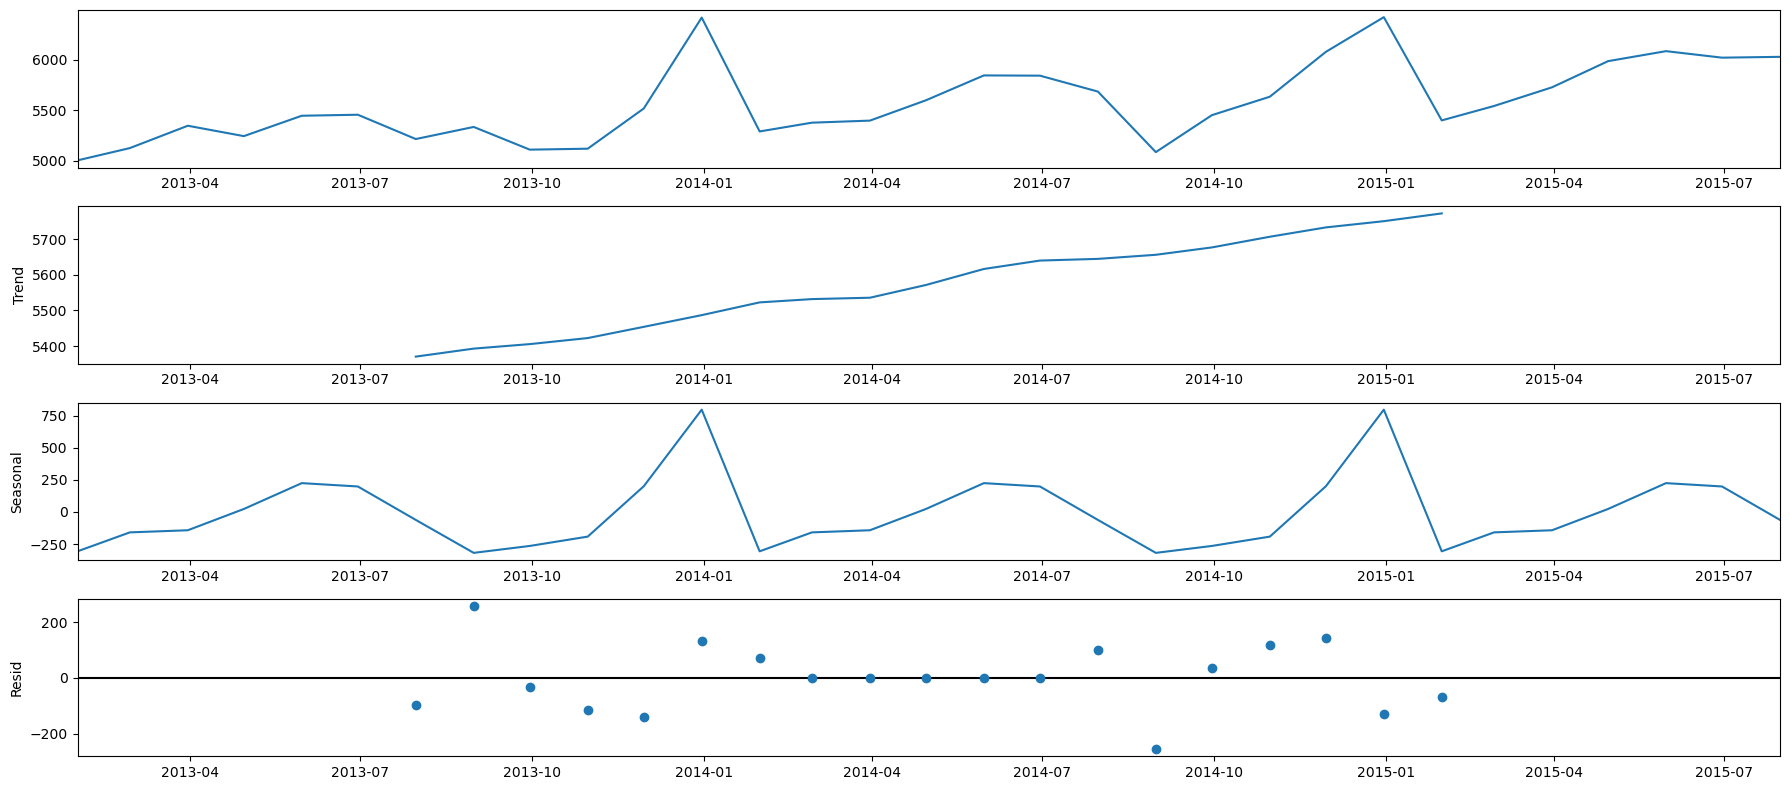

2015-08-31    5365.686585
2015-09-30    5731.455816
2015-10-31    5914.032739
2015-11-30    6358.298893
2015-12-31    6701.618893
2016-01-31    5679.609662
2016-02-29    5822.337226
2016-03-31    6007.071201
2016-04-30    6266.170560
2016-05-31    6365.118024
2016-06-30    6300.686585
2016-07-31    6308.786301
2016-08-31    5648.065479
2016-09-30    6013.834709
2016-10-31    6196.411632
2016-11-30    6640.677786
2016-12-31    6983.997786
2017-01-31    5961.988555
2017-02-28    6104.716120
2017-03-31    6289.450094
2017-04-30    6548.549453
2017-05-31    6647.496917
2017-06-30    6583.065479
2017-07-31    6591.165194
2017-08-31    5930.444372
2017-09-30    6296.213602
2017-10-31    6478.790525
2017-11-30    6923.056679
2017-12-31    7266.376679
Freq: M, Name: predicted_mean, dtype: float64

2015-08-31    5365.686585
2015-09-30    5731.455816
2015-10-31    5914.032739
2015-11-30    6358.298893
2015-12-31    6701.618893
2016-01-31    5679.609662
2016-02-29    5822.337226
2016-03-31    6007.071201
2016-04-30    6266.170560
2016-05-31    6365.118024
2016-06-30    6300.686585
2016-07-31    6308.786301
2016-08-31    5648.065479
2016-09-30    6013.834709
2016-10-31    6196.411632
2016-11-30    6640.677786
2016-12-31    6983.997786
2017-01-31    5961.988555
2017-02-28    6104.716120
2017-03-31    6289.450094
2017-04-30    6548.549453
2017-05-31    6647.496917
2017-06-30    6583.065479
2017-07-31    6591.165194
2017-08-31    5930.444372
2017-09-30    6296.213602
2017-10-31    6478.790525
2017-11-30    6923.056679
2017-12-31    7266.376679
Freq: M, Name: predicted_mean, dtype: float64

In [88]:
sales_prediction(10,store_train_df,12)

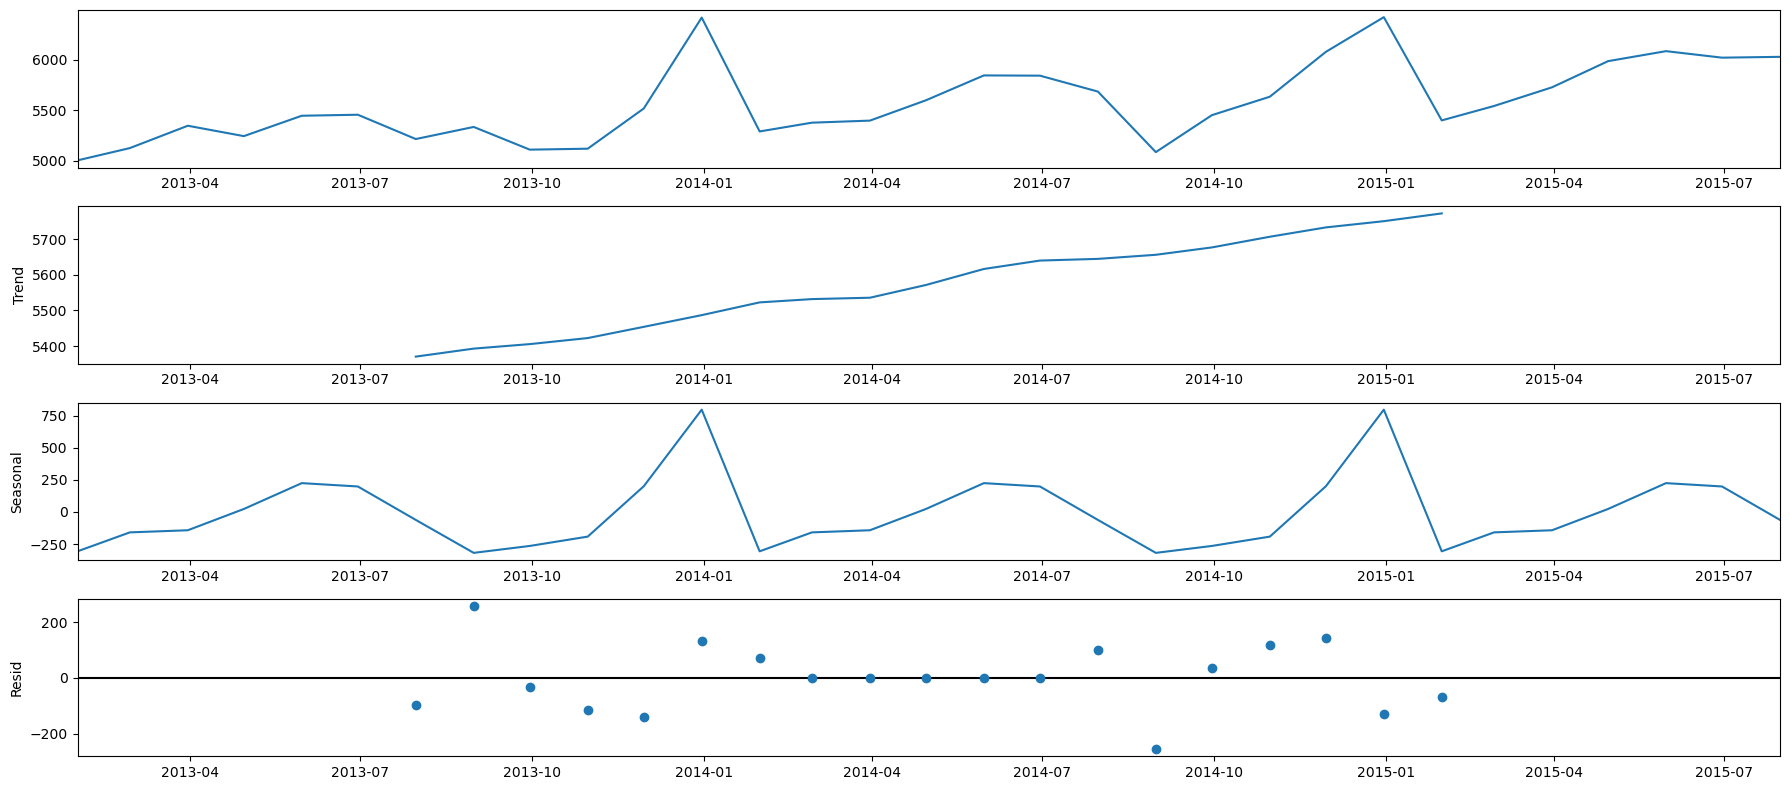

2015-08-31    5365.686585
2015-09-30    5731.455816
2015-10-31    5914.032739
2015-11-30    6358.298893
2015-12-31    6701.618893
2016-01-31    5679.609662
2016-02-29    5822.337226
2016-03-31    6007.071201
2016-04-30    6266.170560
2016-05-31    6365.118024
2016-06-30    6300.686585
2016-07-31    6308.786301
2016-08-31    5648.065479
2016-09-30    6013.834709
2016-10-31    6196.411632
2016-11-30    6640.677786
2016-12-31    6983.997786
2017-01-31    5961.988555
2017-02-28    6104.716120
2017-03-31    6289.450094
2017-04-30    6548.549453
2017-05-31    6647.496917
2017-06-30    6583.065479
2017-07-31    6591.165194
2017-08-31    5930.444372
2017-09-30    6296.213602
2017-10-31    6478.790525
2017-11-30    6923.056679
2017-12-31    7266.376679
Freq: M, Name: predicted_mean, dtype: float64

In [89]:
#projected sales in 2016 and 2017 year
pred = sales_prediction(10,store_train_df,12)

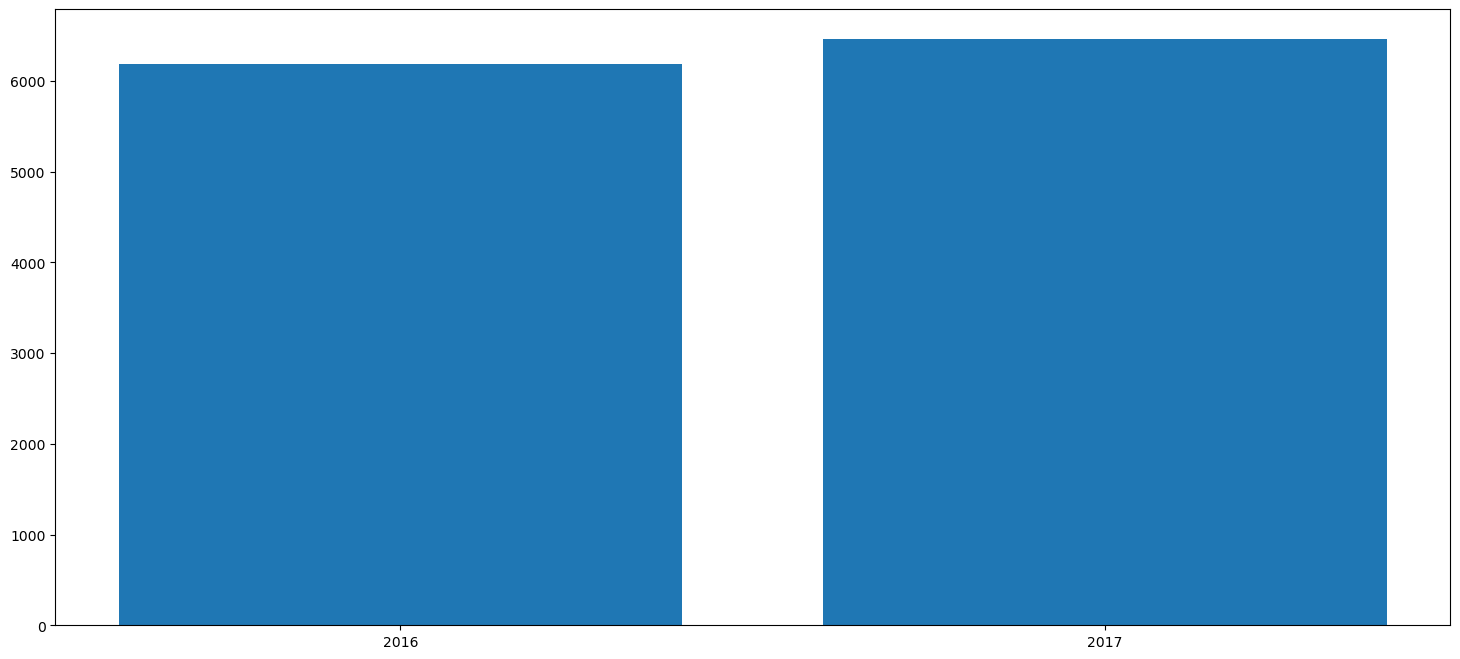

In [90]:
date = ['2016','2017']
data = [pred['2016'].mean(),pred['2017'].mean()]
df = pd.DataFrame({'Date':date,'Data':data})
plt.bar(df['Date'],df['Data'])
plt.xticks()
plt.show()

In [91]:
#Number of Customers expected in 2016 2017 month wise
def cust_prediction(store_id,sales_df,periods):
    cust_df = sales_df[sales_df['Store']==store_id]
    cust_df = cust_df[['Date','Customers']].rename(columns={'Date':'ds','Customers':'y'})
    cust_df = cust_df.sort_values('ds')
    cust_df = cust_df.set_index('ds')
    ts_month = cust_df.resample('M').mean()
    decomposition = sm.tsa.seasonal_decompose(ts_month,model='additive')
    fig = decomposition.plot()
    plt.show()
    p=d=q=range(0,2)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts_month,order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationary = False,
                                            enforce_invertibility=False)
                results = mod.fit()
            except:continue
    mod = sm.tsa.statespace.SARIMAX(ts_month,order=(0,1,1),seasonal_order=(0,1,0,12),enforce_stationary=False,enforce_invertibilty = False)
    results= mod.fit()
    pred_uc = results.get_forecast(steps=29).predicted_mean
    
    return pred_uc        

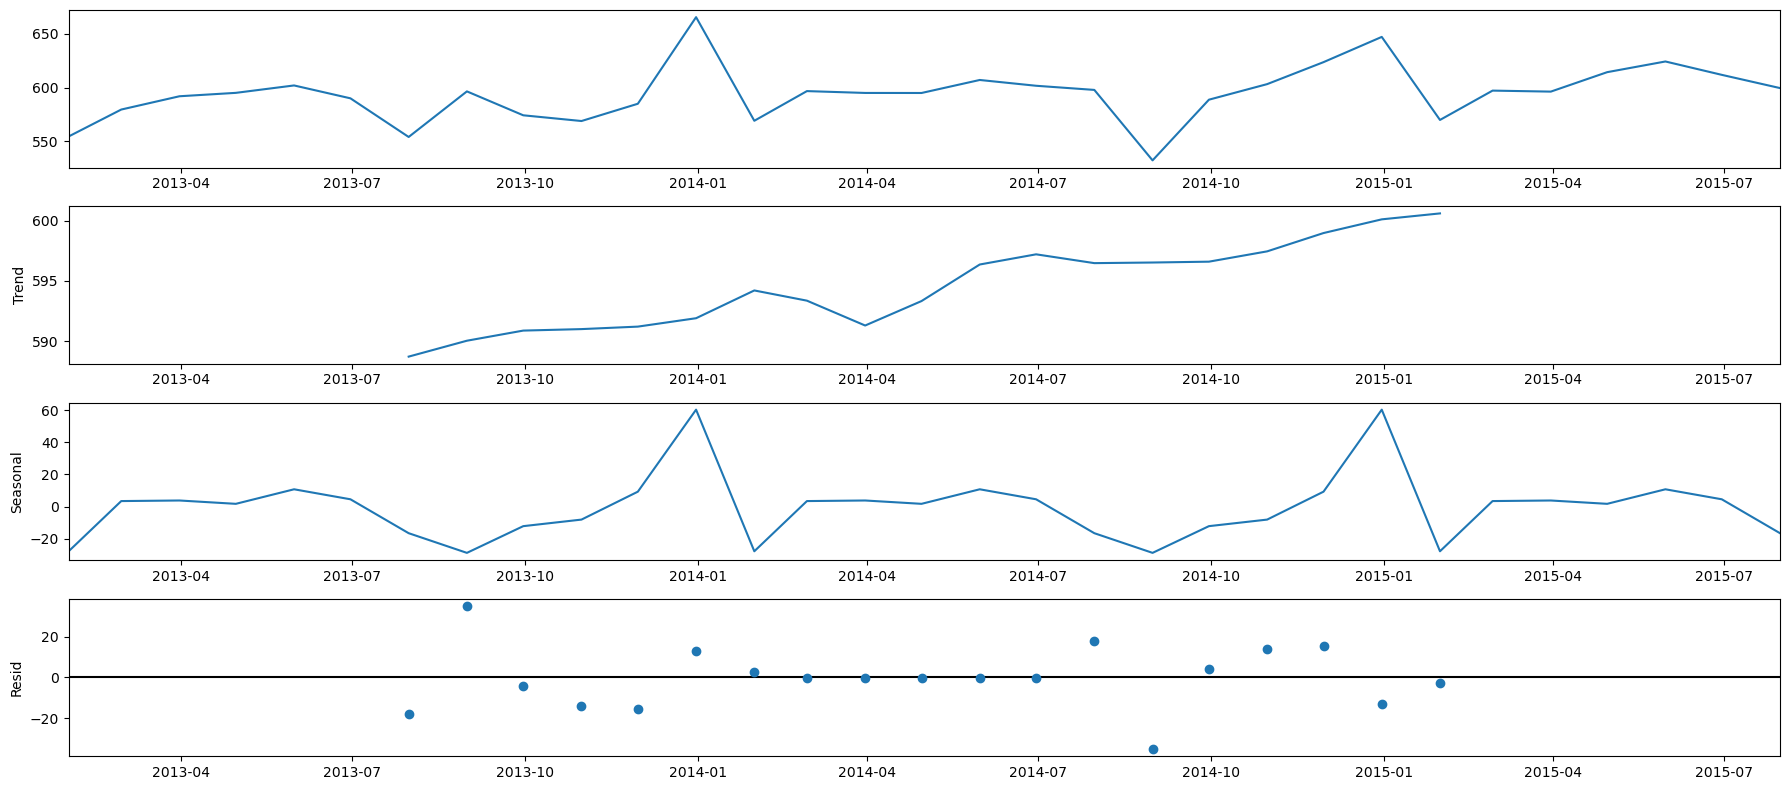

2015-08-31    540.349335
2015-09-30    596.695489
2015-10-31    611.157027
2015-11-30    631.564719
2015-12-31    655.004719
2016-01-31    577.887796
2016-02-29    605.131386
2016-03-31    604.195489
2016-04-30    622.256386
2016-05-31    632.182111
2016-06-30    619.772412
2016-07-31    607.483238
2016-08-31    548.314054
2016-09-30    604.660208
2016-10-31    619.121746
2016-11-30    639.529439
2016-12-31    662.969439
2017-01-31    585.852516
2017-02-28    613.096105
2017-03-31    612.160208
2017-04-30    630.221105
2017-05-31    640.146830
2017-06-30    627.737131
2017-07-31    615.447957
2017-08-31    556.278774
2017-09-30    612.624927
2017-10-31    627.086466
2017-11-30    647.494158
2017-12-31    670.934158
Freq: M, Name: predicted_mean, dtype: float64

In [92]:
cust_prediction(10,store_train_df,12)

In [93]:
#Sales with promo
def salesPromo_prediction(store_id,sales_df,periods):
    sales_df = sales_df[(store_train_df['Store']==10) & (store_train_df['Promo']==1)]
    sales_df = sales_df[['Date','Sales']].rename(columns={'Date':'ds','Sales':'y'})
    sales_df =  sales_df.sort_values('ds')
    sales_df = sales_df.set_index('ds')
    ts_month = sales_df.resample('M').mean()
    decomposition = sm.tsa.seasonal_decompose(ts_month,model='additive')
    fig = decomposition.plot()
    plt.show()
    p=d=q=range(0,2)
    pdq = list(itertools.product(p,d,q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts_month,order=param, 
                                            seasonal_order=param_seasonal,
                                            enforce_stationary = False,
                                            enforce_invertibility=False)
                results = mod.fit()
            except:continue
    mod = sm.tsa.statespace.SARIMAX(ts_month,order=(0,1,1),seasonal_order=(0,1,0,12),enforce_stationary=False,enforce_invertibilty = False)
    results= mod.fit()
    pred_uc = results.get_forecast(steps=29).predicted_mean
   
    return pred_uc  

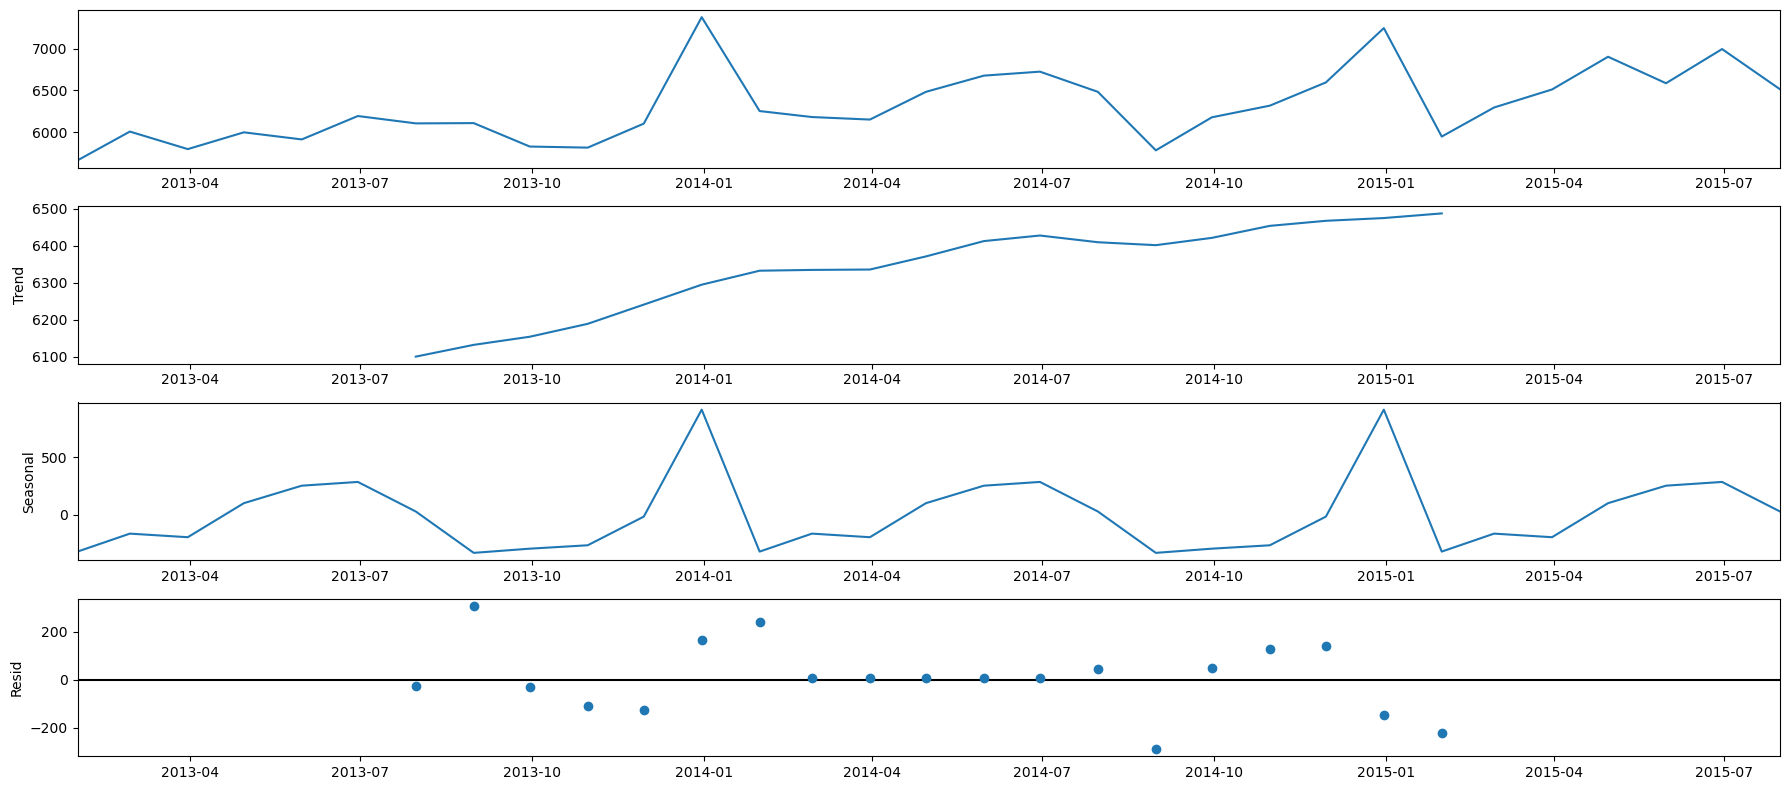

2015-08-31    5913.200719
2015-09-30    6308.852234
2015-10-31    6448.352234
2015-11-30    6726.552234
2015-12-31    7377.418901
2016-01-31    6078.152234
2016-02-29    6426.318901
2016-03-31    6642.102234
2016-04-30    7034.109810
2016-05-31    6716.918901
2016-06-30    7126.268901
2016-07-31    6644.634285
2016-08-31    6044.219619
2016-09-30    6439.871134
2016-10-31    6579.371134
2016-11-30    6857.571134
2016-12-31    7508.437801
2017-01-31    6209.171134
2017-02-28    6557.337801
2017-03-31    6773.121134
2017-04-30    7165.128710
2017-05-31    6847.937801
2017-06-30    7257.287801
2017-07-31    6775.653186
2017-08-31    6175.238520
2017-09-30    6570.890035
2017-10-31    6710.390035
2017-11-30    6988.590035
2017-12-31    7639.456702
Freq: M, Name: predicted_mean, dtype: float64

In [94]:
salesPromo_prediction(10,store_train_df,12)

In [95]:
sales={}
def Top10_sales_prediction(store_id,sales_df,periods):
    sales_df = sales_df[sales_df['Store']==store_id]
    sales_df = sales_df[['Date','Sales']].rename(columns={'Date':'ds','Sales':'y'})
    sales_df =  sales_df.sort_values('ds')
    sales_df = sales_df.set_index('ds')
    ts_month = sales_df.resample('M').mean()
    mod = sm.tsa.statespace.SARIMAX(ts_month,order=(0,1,1),seasonal_order=(0,1,0,12),enforce_stationary=False,enforce_invertibilty = False)
    results= mod.fit()
    pred_uc = results.get_forecast(steps=29).predicted_mean
    sales = pred_uc.tail(24).mean()
    return sales

In [98]:
stores = store_train_df['Store'].unique()
pred={}
#stores = [1,2,3,4,5]
for store in stores:
    print(store)
    pred.update({store:Top10_sales_prediction(store,store_train_df,12)})
df = pd.DataFrame(pred.values(),pred.keys())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [102]:
df.to_excel("OverallSalesStorewise.xlsx")

In [103]:
sorted(df)

[0]

In [112]:
#Top10 store by sales for 2016 and 2017
df.sort_values(0,ascending = False).head(10)

,0
1114,26210.755959
262,24195.591459
251,20400.318915
842,20277.775352
817,19809.895623
560,18989.051409
562,18808.352694
827,18417.309446
192,18402.646428
756,18389.973936


In [114]:
#Bottom10 store by sales for 2016 and 2017
df.sort_values(0,ascending = False).tail(10)

,0
1039,2470.605589
629,2421.499349
841,2314.449107
286,2241.634626
956,2088.162185
264,1995.952349
303,1923.358202
839,1795.853641
91,1278.010873
169,-139.041931
